In [1]:
from sklearn.manifold import TSNE
import pandas as pd
import nltk
from nltk.stem import PorterStemmer
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from nltk.probability import FreqDist
from nltk.corpus import stopwords
from sklearn.metrics import confusion_matrix
import seaborn as sns
from sklearn.naive_bayes import MultinomialNB
from sklearn import metrics
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from tqdm import tqdm
from nltk.tokenize import RegexpTokenizer
tokenizer = RegexpTokenizer(r'[a-zA-Z0-9]+')
from gensim import matutils, models
import scipy.sparse
import string
from collections import Counter
import pyLDAvis.gensim
from gensim import corpora, models, similarities
from gensim.models.ldamulticore import LdaMulticore
from sklearn.decomposition import LatentDirichletAllocation

# Inception

In [2]:
#read in Inception csv
Inception = pd.read_csv('Inception.csv')
Inception.drop(columns=['Unnamed: 0'], axis = 1, inplace = True)
Inception.head()

,date,tweet,language,hashtags,username,link,retweet,nlikes,nreplies,nretweets,retweet_date,vader_score,positive sentiment score,negative sentiment score,neutral sentiment score,compound sentiment score
0,2011-07-11 19:59:41,Who understands that Inception movie?,en,[],debbie_nthejets,https://twitter.com/debbie_nthejets/status/905...,False,0,0,0,NaN,0.0000,0.000,0.0,1.000,0.0000
1,2011-07-11 19:59:29,Inception in my pants #improvefilmtitlesbyaddi...,en,['improvefilmtitlesbyaddinginmypants'],MercDeejay,https://twitter.com/MercDeejay/status/90570938...,False,0,0,0,NaN,0.0000,0.000,0.0,1.000,0.0000
2,2011-07-11 19:59:09,RT @ imNot_daFather #GreatHighMovie Inception,en,['greathighmovie'],Lejailatroi,https://twitter.com/Lejailatroi/status/9057085...,False,0,0,0,NaN,0.0000,0.000,0.0,1.000,0.0000
3,2011-07-11 19:58:23,never saw inception,en,[],6tacey,https://twitter.com/6tacey/status/905706630473...,False,0,0,1,NaN,0.0000,0.000,0.0,1.000,0.0000
4,2011-07-11 19:57:45,@jck49erfan @Cornholio3000 was inception the o...,en,[],JHScramble,https://twitter.com/JHScramble/status/90570505...,False,0,2,0,NaN,0.4215,0.123,0.0,0.877,0.4215


## Latent Dirichlet Allocation

Latent Dirichlet Allocation is used to categorize topics within tweets of different movies.  

In [3]:
#tokenizing each tweet
tokenized_tweets = []
for tweet in Inception['tweet']:
    tokenized_tweets.append(tokenizer.tokenize(tweet.lower())) #making all tweets lowercase so no word is duplicated later on
# tokenized_tweets

In [4]:
#creating a stop words list - these words don't add much value

additional_stopwords = ['https', 'I', 'com', 'http', 'RT', 'co', 'the', 'amp', 'the', 'lt', 'A', 'www', 'rt', 'got', 'get', 
                        'ly', 'u']
stopwords_list = stopwords.words('english')
stopwords_list += list(string.punctuation)
stopwords_list += additional_stopwords

# print(stopwords_list)

In [5]:
# isolating every word within tweets for the Inception movie (not including stop words)
tweets = []
for tweet in tokenized_tweets:
    for word in tweet:
        if word not in stopwords_list:
            tweets.append(word)
# tweets

In [6]:
#stemmed tweets
ps = PorterStemmer()

stemmed_tweets=[]
for tweet in tokenized_tweets:
    stemmed_words = []
    for word in tweet:
        if word not in stopwords_list:
            stemmed_words.append(ps.stem(word))
    
    stemmed_tweets.append(stemmed_words)

# stemmed_tweets

In [7]:
#add columns into Inception dataframe

#stemmed tweets list
Inception['stemmed'] = stemmed_tweets

#stemmed tweets string
stemmed_tweets_lst = []
for tweet in Inception['stemmed'].tolist():
    stemmed_tweets_lst.append(" ".join(tweet))

Inception['string_stemmed'] = stemmed_tweets_lst

Inception.head()

,date,tweet,language,hashtags,username,link,retweet,nlikes,nreplies,nretweets,retweet_date,vader_score,positive sentiment score,negative sentiment score,neutral sentiment score,compound sentiment score,stemmed,string_stemmed
0,2011-07-11 19:59:41,Who understands that Inception movie?,en,[],debbie_nthejets,https://twitter.com/debbie_nthejets/status/905...,False,0,0,0,NaN,0.0000,0.000,0.0,1.000,0.0000,"[understand, incept, movi]",understand incept movi
1,2011-07-11 19:59:29,Inception in my pants #improvefilmtitlesbyaddi...,en,['improvefilmtitlesbyaddinginmypants'],MercDeejay,https://twitter.com/MercDeejay/status/90570938...,False,0,0,0,NaN,0.0000,0.000,0.0,1.000,0.0000,"[incept, pant, improvefilmtitlesbyaddinginmyp]",incept pant improvefilmtitlesbyaddinginmyp
2,2011-07-11 19:59:09,RT @ imNot_daFather #GreatHighMovie Inception,en,['greathighmovie'],Lejailatroi,https://twitter.com/Lejailatroi/status/9057085...,False,0,0,0,NaN,0.0000,0.000,0.0,1.000,0.0000,"[imnot, dafath, greathighmovi, incept]",imnot dafath greathighmovi incept
3,2011-07-11 19:58:23,never saw inception,en,[],6tacey,https://twitter.com/6tacey/status/905706630473...,False,0,0,1,NaN,0.0000,0.000,0.0,1.000,0.0000,"[never, saw, incept]",never saw incept
4,2011-07-11 19:57:45,@jck49erfan @Cornholio3000 was inception the o...,en,[],JHScramble,https://twitter.com/JHScramble/status/90570505...,False,0,2,0,NaN,0.4215,0.123,0.0,0.877,0.4215,"[jck49erfan, cornholio3000, incept, one, leo, ...",jck49erfan cornholio3000 incept one leo patien...


Each row represents a tweet and the stemmed columns represent every stemmed word tweeted about Inception.

In [8]:
# sparse Document Term Matrix

vec = CountVectorizer(stop_words=stopwords_list)
X = vec.fit_transform(Inception['string_stemmed'].tolist())

# list of words
# vec.get_feature_names()

In [9]:
df = pd.DataFrame(X.toarray(), columns = vec.get_feature_names())
print(df.shape)
df.head()

(5100, 6420)


,000,00a,00pm,02,03zutlg,04gb,07,090,0cdefc1,0dizzl,...,zooeyglass,zookeep,zoveel,zpdfj,zpxw4,zuckerberg,zumba,zvkyj,zw3yz,zzzzzzz
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [10]:
#dictionary of numbers to words
dictionary = corpora.Dictionary(Inception['stemmed'])
type(dictionary)
len(dictionary)

6461

In [11]:
#bag of words (tokenid, tokencount)
corpus = [dictionary.doc2bow(d) for d in Inception['stemmed']]
# corpus

In [12]:
#running LDA model
lda = models.LdaMulticore(corpus=corpus, id2word=dictionary, num_topics=5, passes=10)
lda.print_topics()

[(0,
  '0.105*"incept" + 0.042*"dream" + 0.026*"like" + 0.026*"watch" + 0.019*"movi" + 0.011*"within" + 0.009*"time" + 0.009*"lol" + 0.008*"play" + 0.006*"brain"'),
 (1,
  '0.097*"incept" + 0.024*"movi" + 0.019*"watch" + 0.014*"gonna" + 0.011*"rock" + 0.010*"like" + 0.009*"dream" + 0.009*"inmyp" + 0.007*"tri" + 0.007*"time"'),
 (2,
  '0.085*"incept" + 0.016*"good" + 0.015*"watch" + 0.011*"movi" + 0.008*"pant" + 0.008*"like" + 0.006*"dicaprio" + 0.005*"blu" + 0.005*"3" + 0.005*"ray"'),
 (3,
  '0.121*"incept" + 0.027*"watch" + 0.009*"bit" + 0.008*"movi" + 0.006*"time" + 0.006*"sinc" + 0.005*"go" + 0.005*"dark" + 0.004*"film" + 0.004*"see"'),
 (4,
  '0.225*"incept" + 0.217*"pant" + 0.161*"improvefilmtitlesbyaddinginmyp" + 0.009*"lol" + 0.006*"improvemovietitlesbyaddinginmyp" + 0.005*"watch" + 0.003*"time" + 0.002*"fuck" + 0.002*"ever" + 0.002*"mind"')]

In [13]:
#clarifying LDA model
for elem in lda.print_topics(-1):
    print("Topic", elem[0], "\nWords:", elem[1])

Topic 0 
Words: 0.105*"incept" + 0.042*"dream" + 0.026*"like" + 0.026*"watch" + 0.019*"movi" + 0.011*"within" + 0.009*"time" + 0.009*"lol" + 0.008*"play" + 0.006*"brain"
Topic 1 
Words: 0.097*"incept" + 0.024*"movi" + 0.019*"watch" + 0.014*"gonna" + 0.011*"rock" + 0.010*"like" + 0.009*"dream" + 0.009*"inmyp" + 0.007*"tri" + 0.007*"time"
Topic 2 
Words: 0.085*"incept" + 0.016*"good" + 0.015*"watch" + 0.011*"movi" + 0.008*"pant" + 0.008*"like" + 0.006*"dicaprio" + 0.005*"blu" + 0.005*"3" + 0.005*"ray"
Topic 3 
Words: 0.121*"incept" + 0.027*"watch" + 0.009*"bit" + 0.008*"movi" + 0.006*"time" + 0.006*"sinc" + 0.005*"go" + 0.005*"dark" + 0.004*"film" + 0.004*"see"
Topic 4 
Words: 0.225*"incept" + 0.217*"pant" + 0.161*"improvefilmtitlesbyaddinginmyp" + 0.009*"lol" + 0.006*"improvemovietitlesbyaddinginmyp" + 0.005*"watch" + 0.003*"time" + 0.002*"fuck" + 0.002*"ever" + 0.002*"mind"


In [16]:
# Display model
pyLDAvis.enable_notebook()
vis = pyLDAvis.gensim.prepare(lda, corpus, dictionary)
vis
# pyLDAvis.save_html(vis, 'images/lda_inception.html')

PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
3      0.051580 -0.007995       1        1  27.231295
0      0.079256  0.024450       2        1  25.027322
4     -0.241105  0.009472       3        1  22.250136
2      0.045289 -0.124063       4        1  12.766331
1      0.064981  0.098135       5        1  12.724916, topic_info=                               Term         Freq        Total Category  \
4                              pant  1607.000000  1607.000000  Default   
3    improvefilmtitlesbyaddinginmyp  1164.000000  1164.000000  Default   
0                            incept  4254.000000  4254.000000  Default   
53                            dream   427.000000   427.000000  Default   
45                             like   292.000000   292.000000  Default   
..                              ...          ...          ...      ...   
267                            wake    10.025530    30.970131   Topic5   
196                           video    10.114042    33.546202   Topic5   
38                             sinc    12.307738    97.746986   Topic5   
8                             never     9.736212    44.165055   Topic5   
99                             play     9.563826    78.733943   Topic5   

     logprob  loglift  
4    30.0000  30.0000  
3    29.0000  29.0000  
0    28.0000  28.0000  
53   27.0000  27.0000  
45   26.0000  26.0000  
..       ...      ...  
267  -6.0117   0.9337  
196  -6.0029   0.8626  
38   -5.8066  -0.0105  
8    -6.0410   0.5495  
99   -6.0589  -0.0465  

[354 rows x 6 columns], token_table=      Topic      Freq    Term
term                         
58        1  0.593298       1
58        2  0.197766       1
58        3  0.141262       1
58        4  0.056505       1
58        5  0.028252       1
...     ...       ...     ...
863       1  0.384493  youtub
863       2  0.085443  youtub
863       3  0.085443  youtub
863       5  0.427215  youtub
2230      1  0.916591   zumba

[629 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[4, 1, 5, 3, 2])

## T-SNE

In [19]:
print(range(len(corpus)))
#LDA matrix results
X = []
for i in range(len(corpus)):
    if len(lda[corpus[i]]) == 5:
        X.append([y for (x,y) in lda[corpus[i]]])       
# X

range(0, 5100)


In [20]:
#reduce dimensionality
tsne = TSNE(n_components=2, random_state=27)
embedding = tsne.fit_transform(np.array(X))
embedding = pd.DataFrame(embedding, columns=['x','y'])
embedding['hue'] = np.array(X).argmax(axis=1)

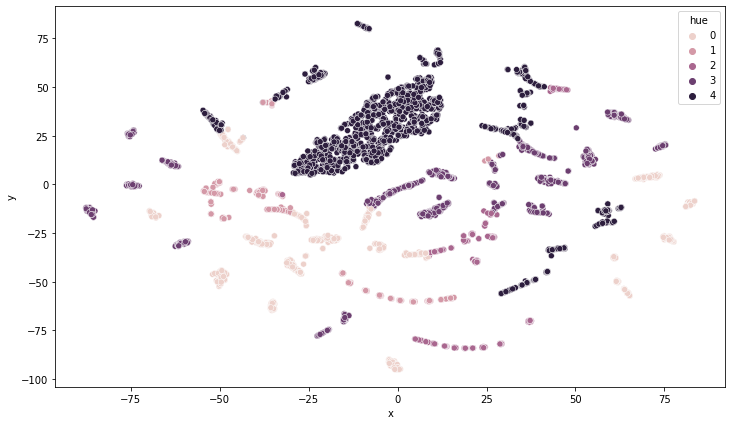

In [21]:
# plot of reduced dimensionality for Inception
fig, ax = plt.subplots(figsize =(12,7))
sns.scatterplot(
    x = "x", y="y",
    hue="hue",
    ax = ax,
    data=embedding)
plt.title('Inception', fontsize = 17)
plt.savefig('images/tsne_inception.jpg')

# Ingrid Goes West

## LDA 

In [22]:
#read in Ingrid Goes West csv
IngridGoesWest = pd.read_csv('IngridGoesWest.csv')
IngridGoesWest.drop(columns=['Unnamed: 0'], axis = 1, inplace = True)
IngridGoesWest.head()

,date,tweet,language,hashtags,username,link,retweet,nlikes,nreplies,nretweets,retweet_date,vader_score,positive sentiment score,negative sentiment score,neutral sentiment score,compound sentiment score
0,2018-08-23 18:50:34,Another day another avocado toast. #avocadotoa...,en,"['avocadotoast', 'ingridgoeswest', '31days31ph...",ShepherdGirl,https://twitter.com/ShepherdGirl/status/103276...,False,0,0,0,NaN,0.0000,0.000,0.000,1.000,0.0000
1,2018-08-23 17:32:00,#IngridGoesWest is a total package when you wa...,en,['ingridgoeswest'],BisiAdediran,https://twitter.com/BisiAdediran/status/103274...,False,0,0,0,NaN,0.3400,0.111,0.062,0.827,0.3400
2,2018-08-23 13:00:47,44. Step 45. The dark tower 46. Ingrid goes we...,en,[],wawalily247,https://twitter.com/wawalily247/status/1032674...,False,0,0,0,NaN,0.4404,0.083,0.000,0.917,0.4404
3,2018-08-23 04:13:02,INGRID GOES WEST [Official Teaser] - August 20...,en,[],ScreenTweet,https://twitter.com/ScreenTweet/status/1032541...,False,0,0,0,NaN,-0.2500,0.000,0.182,0.818,-0.2500
4,2018-08-23 02:50:58,two movies own my whole heart and that is the ...,en,[],didntifade,https://twitter.com/didntifade/status/10325205...,False,1,0,0,NaN,0.6369,0.208,0.000,0.792,0.6369


In [23]:
#tokenizing each tweet
tokenized_tweets = []
for tweet in IngridGoesWest['tweet']:
    tokenized_tweets.append(tokenizer.tokenize(tweet.lower())) #making all tweets lowercase so no word is duplicated later on
    
# tokenized_tweets

In [24]:
#stemmed words of tweets
ps = PorterStemmer()

stemmed_tweets=[]
for tweet in tokenized_tweets:
    stemmed_words = []
    for word in tweet:
        if word not in stopwords_list:
            stemmed_words.append(ps.stem(word))
    
    stemmed_tweets.append(stemmed_words)

# stemmed_tweets

In [25]:
#add stemmed words into dataframe

#stemmed words list
IngridGoesWest['stemmed'] = stemmed_tweets

#stemmed words tweet
stemmed_tweets_lst = []
for tweet in IngridGoesWest['stemmed'].tolist():
    stemmed_tweets_lst.append(" ".join(tweet))

IngridGoesWest['string_stemmed'] = stemmed_tweets_lst

IngridGoesWest.head()

,date,tweet,language,hashtags,username,link,retweet,nlikes,nreplies,nretweets,retweet_date,vader_score,positive sentiment score,negative sentiment score,neutral sentiment score,compound sentiment score,stemmed,string_stemmed
0,2018-08-23 18:50:34,Another day another avocado toast. #avocadotoa...,en,"['avocadotoast', 'ingridgoeswest', '31days31ph...",ShepherdGirl,https://twitter.com/ShepherdGirl/status/103276...,False,0,0,0,NaN,0.0000,0.000,0.000,1.000,0.0000,"[anoth, day, anoth, avocado, toast, avocadotoa...",anoth day anoth avocado toast avocadotoast ing...
1,2018-08-23 17:32:00,#IngridGoesWest is a total package when you wa...,en,['ingridgoeswest'],BisiAdediran,https://twitter.com/BisiAdediran/status/103274...,False,0,0,0,NaN,0.3400,0.111,0.062,0.827,0.3400,"[ingridgoeswest, total, packag, want, advis, s...",ingridgoeswest total packag want advis sorri a...
2,2018-08-23 13:00:47,44. Step 45. The dark tower 46. Ingrid goes we...,en,[],wawalily247,https://twitter.com/wawalily247/status/1032674...,False,0,0,0,NaN,0.4404,0.083,0.000,0.917,0.4404,"[44, step, 45, dark, tower, 46, ingrid, goe, w...",44 step 45 dark tower 46 ingrid goe west 47 na...
3,2018-08-23 04:13:02,INGRID GOES WEST [Official Teaser] - August 20...,en,[],ScreenTweet,https://twitter.com/ScreenTweet/status/1032541...,False,0,0,0,NaN,-0.2500,0.000,0.182,0.818,-0.2500,"[ingrid, goe, west, offici, teaser, august, 20...",ingrid goe west offici teaser august 2017 neon...
4,2018-08-23 02:50:58,two movies own my whole heart and that is the ...,en,[],didntifade,https://twitter.com/didntifade/status/10325205...,False,1,0,0,NaN,0.6369,0.208,0.000,0.792,0.6369,"[two, movi, whole, heart, king, summer, ingrid...",two movi whole heart king summer ingrid goe west


In [26]:
# sparse Document Term Matrix
vec = CountVectorizer(stop_words=stopwords_list)
X = vec.fit_transform(IngridGoesWest['string_stemmed'].tolist())
df = pd.DataFrame(X.toarray(), columns = vec.get_feature_names())
df.head()

,00,000,01,03,03r1y4v3l2,03ug2g0kfi,05,05mfzdgjrf,06,07,...,zvq9zr3hg,zvvrqycogw,zvyagintsev,zwfil4zopz,zwskaxpq6k,zx6079v1w9,zz31znmrok,zzbhlcobxr,zztd7pzbvc,zztopport
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [27]:
#dictionary of numbers matched with words
dictionary = corpora.Dictionary(IngridGoesWest['stemmed'])

In [28]:
#bag of words (tokenid, tokencount)
corpus = []
for tweet in IngridGoesWest['stemmed']:
    corpus.append(dictionary.doc2bow(tweet))

In [29]:
#running LDA model for Ingrid Goes West
lda = models.LdaMulticore(corpus=corpus, id2word=dictionary, num_topics=5, passes=10)
for elem in lda.print_topics():
    print("Topic", elem[0], "\nWords:", elem[1])

Topic 0 
Words: 0.050*"ingrid" + 0.048*"goe" + 0.048*"west" + 0.028*"watch" + 0.022*"movi" + 0.017*"ingridgoeswest" + 0.012*"social" + 0.012*"like" + 0.011*"media" + 0.011*"good"
Topic 1 
Words: 0.097*"ingridgoeswest" + 0.018*"win" + 0.015*"evilhag" + 0.014*"aubreyplaza" + 0.014*"watch" + 0.011*"efcompetit" + 0.010*"dvd" + 0.010*"osheajacksonjr" + 0.010*"chanc" + 0.009*"follow"
Topic 2 
Words: 0.094*"ingrid" + 0.093*"goe" + 0.093*"west" + 0.018*"watch" + 0.016*"movi" + 0.013*"win" + 0.011*"dvd" + 0.011*"love" + 0.008*"ingridgoeswest" + 0.008*"heyuguy"
Topic 3 
Words: 0.043*"ingrid" + 0.042*"goe" + 0.041*"west" + 0.013*"plaza" + 0.012*"aubrey" + 0.010*"olsen" + 0.010*"elizabeth" + 0.009*"ingridgoeswest" + 0.008*"movi" + 0.008*"2017"
Topic 4 
Words: 0.074*"ingrid" + 0.071*"goe" + 0.071*"west" + 0.020*"watch" + 0.019*"2017" + 0.008*"movi" + 0.008*"spicer" + 0.008*"matt" + 0.007*"like" + 0.006*"social"


In [31]:
#Display Ingrid Goes West model
pyLDAvis.enable_notebook()
vis = pyLDAvis.gensim.prepare(lda, corpus, dictionary)
vis
# pyLDAvis.save_html(vis, 'images/lda_ingridgoeswest.html')

PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
0      0.036273  0.074964       1        1  29.444394
2      0.045978  0.045374       2        1  26.404067
3      0.072595 -0.145991       3        1  21.424754
4      0.073295  0.038633       4        1  16.510209
1     -0.228140 -0.012980       5        1   6.216576, topic_info=                Term         Freq        Total Category  logprob  loglift
5     ingridgoeswest   953.000000   953.000000  Default  30.0000  30.0000
54              west  3669.000000  3669.000000  Default  29.0000  29.0000
46            ingrid  3780.000000  3780.000000  Default  28.0000  28.0000
44               goe  3691.000000  3691.000000  Default  27.0000  27.0000
1392             win   284.000000   284.000000  Default  26.0000  26.0000
...              ...          ...          ...      ...      ...      ...
134             like    13.242084   386.187516   Topic5  -5.6731  -0.5950
193             hulu     9.766973   139.675266   Topic5  -5.9775   0.1176
18              love    10.478098   295.342145   Topic5  -5.9072  -0.5609
83             thank     8.234823    58.496265   Topic5  -6.1482   0.8174
739              saw     8.061790    96.552335   Topic5  -6.1694   0.2950

[363 rows x 6 columns], token_table=      Topic      Freq        Term
term                             
214       1  0.104640           1
214       2  0.186026           1
214       3  0.651091           1
214       4  0.046506           1
817       1  0.194202          10
...     ...       ...         ...
131       4  0.054063        wind
5792      2  0.929688  xunlwectek
5751      2  0.929690  y4ldygbijo
5522      3  0.950102     yodajon
5785      2  0.929688   you7c8cjr

[733 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[1, 3, 4, 5, 2])

## TSNE 

In [32]:
#LDA matrix results
X = []
for i in range(len(corpus)):
    if len(lda[corpus[i]]) == 5:
        X.append([y for (x,y) in lda[corpus[i]]])       
# X

In [33]:
#reduce dimensionality
tsne = TSNE(n_components=2, random_state=27)
embedding = tsne.fit_transform(np.array(X))
embedding = pd.DataFrame(embedding, columns=['x','y'])
embedding['hue'] = np.array(X).argmax(axis=1)

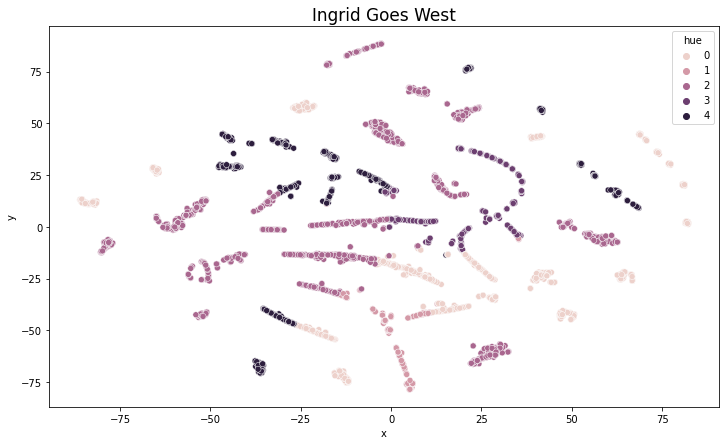

In [40]:
#t-sne plot 
fig, ax = plt.subplots(figsize =(12,7))
sns.scatterplot(
    x = "x", y="y",
    hue="hue",
    ax = ax,
    data=embedding)
plt.title('Ingrid Goes West', fontsize = 17)
plt.savefig('images/tsne_ingridgoeswest.jpg')

# Big Sick

## LDA

In [41]:
#read in the Big Sick
BigSick = pd.read_csv('BigSick.csv')
BigSick.drop(columns=['Unnamed: 0'], axis = 1, inplace = True) 
BigSick.head()

,date,tweet,language,hashtags,username,link,retweet,nlikes,nreplies,nretweets,vader_score,positive sentiment score,negative sentiment score,neutral sentiment score,compound sentiment score
0,2018-07-12 19:40:09,@kumailn I just saw the Big Sick and you are a...,en,[],lellomoke,https://twitter.com/lellomoke/status/101755423...,False,0,0,0,0.7384,0.245,0.095,0.660,0.7384
1,2018-07-12 19:25:45,@kumailn Just finished The Big Sick. It was s...,en,[],klingerock,https://twitter.com/klingerock/status/10175506...,False,0,0,0,0.3268,0.274,0.195,0.531,0.3268
2,2018-07-12 19:02:35,I added a video to a @YouTube playlist https:...,en,[],TheRedShamrock,https://twitter.com/TheRedShamrock/status/1017...,False,0,0,0,-0.5106,0.000,0.202,0.798,-0.5106
3,2018-07-12 17:22:11,@kumailn damn why did I just now watch the big...,en,[],hanneskaeufler,https://twitter.com/hanneskaeufler/status/1017...,False,1,1,0,-0.4017,0.172,0.301,0.527,-0.4017
4,2018-07-12 15:39:02,At the beginning of a relationship: “omg you’r...,en,[],EwdatsGROSS,https://twitter.com/EwdatsGROSS/status/1017493...,False,34,0,3,0.0785,0.182,0.176,0.642,0.0785


In [42]:
#tokenizing each tweet
tokenized_tweets = []
for tweet in BigSick['tweet']:
    tokenized_tweets.append(tokenizer.tokenize(tweet.lower())) #making all tweets lowercase so no word is duplicated later on
    
# tokenized_tweets

In [43]:
#stemming tweets

stemmed_tweets=[]
for tweet in tokenized_tweets:
    stemmed_words = []
    for word in tweet:
        if word not in stopwords_list:
            stemmed_words.append(ps.stem(word))
    
    stemmed_tweets.append(stemmed_words)

# stemmed_tweets

In [44]:
#adding to Big Sick dataframe 

#stemmed tweets list version
BigSick['stemmed'] = stemmed_tweets

#string version
stemmed_tweets_str_lst = []
for tweet in BigSick['stemmed'].tolist():
    stemmed_tweets_str_lst.append(" ".join(tweet))

BigSick['string_stemmed'] = stemmed_tweets_str_lst

BigSick.head()

,date,tweet,language,hashtags,username,link,retweet,nlikes,nreplies,nretweets,vader_score,positive sentiment score,negative sentiment score,neutral sentiment score,compound sentiment score,stemmed,string_stemmed
0,2018-07-12 19:40:09,@kumailn I just saw the Big Sick and you are a...,en,[],lellomoke,https://twitter.com/lellomoke/status/101755423...,False,0,0,0,0.7384,0.245,0.095,0.660,0.7384,"[kumailn, saw, big, sick, amaz, happi, wife, r...",kumailn saw big sick amaz happi wife recov
1,2018-07-12 19:25:45,@kumailn Just finished The Big Sick. It was s...,en,[],klingerock,https://twitter.com/klingerock/status/10175506...,False,0,0,0,0.3268,0.274,0.195,0.531,0.3268,"[kumailn, finish, big, sick, fuck, good]",kumailn finish big sick fuck good
2,2018-07-12 19:02:35,I added a video to a @YouTube playlist https:...,en,[],TheRedShamrock,https://twitter.com/TheRedShamrock/status/1017...,False,0,0,0,-0.5106,0.000,0.202,0.798,-0.5106,"[ad, video, youtub, playlist, 3oxcf1nudi, s5e2...",ad video youtub playlist 3oxcf1nudi s5e29 2017...
3,2018-07-12 17:22:11,@kumailn damn why did I just now watch the big...,en,[],hanneskaeufler,https://twitter.com/hanneskaeufler/status/1017...,False,1,1,0,-0.4017,0.172,0.301,0.527,-0.4017,"[kumailn, damn, watch, big, sick, realli, enjoy]",kumailn damn watch big sick realli enjoy
4,2018-07-12 15:39:02,At the beginning of a relationship: “omg you’r...,en,[],EwdatsGROSS,https://twitter.com/EwdatsGROSS/status/1017493...,False,34,0,3,0.0785,0.182,0.176,0.642,0.0785,"[begin, relationship, omg, funni, love, sens, ...",begin relationship omg funni love sens humour ...


In [45]:
# sparse Document Term Matrix
vec = CountVectorizer(stop_words=stopwords_list)
X = vec.fit_transform(BigSick['string_stemmed'].tolist())
df = pd.DataFrame(X.toarray(), columns = vec.get_feature_names())
df.head()

,00,000,007,00pm,01,02,025,02uemq83hd,03,03mz3dbxtl,...,ztbqrlfr7j,zto8ktfnwv,ztxyln1gso,zucchini,zucker,zumanurr,zve60sra4b,zw1ukjimji,zy3pcbgrrv,zzo9yhxcjp
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [46]:
#dictionary of numbers to words
dictionary = corpora.Dictionary(BigSick['stemmed'])

In [47]:
#bag of words (tokenid, tokencount)
corpus = []
for tweet in BigSick['stemmed']:
    corpus.append(dictionary.doc2bow(tweet))

In [48]:
#running LDA model for The Big Sick
lda = models.LdaMulticore(corpus=corpus, id2word=dictionary, num_topics=5, passes=10)
#created a for loop to seperate Topic and Words for clairty
for elem in lda.print_topics():
    print("Topic", elem[0], "\nWords:", elem[1])

Topic 0 
Words: 0.031*"big" + 0.031*"sick" + 0.017*"2017" + 0.010*"2016" + 0.009*"2015" + 0.009*"2014" + 0.008*"2013" + 0.008*"2010" + 0.008*"2012" + 0.008*"2011"
Topic 1 
Words: 0.073*"big" + 0.072*"sick" + 0.017*"watch" + 0.016*"kumailn" + 0.012*"like" + 0.008*"good" + 0.007*"love" + 0.006*"film" + 0.006*"comedi" + 0.005*"michael"
Topic 2 
Words: 0.070*"big" + 0.069*"sick" + 0.014*"watch" + 0.012*"love" + 0.006*"kumailn" + 0.006*"kumail" + 0.006*"2017" + 0.005*"good" + 0.004*"like" + 0.004*"nanjiani"
Topic 3 
Words: 0.072*"big" + 0.070*"sick" + 0.016*"kumail" + 0.011*"kumailn" + 0.011*"nanjiani" + 0.009*"movi" + 0.008*"valley" + 0.008*"silicon" + 0.007*"2017" + 0.006*"talk"
Topic 4 
Words: 0.085*"big" + 0.083*"sick" + 0.032*"movi" + 0.028*"watch" + 0.020*"kumailn" + 0.014*"love" + 0.009*"good" + 0.008*"great" + 0.008*"film" + 0.007*"final"


In [50]:
#Display Big Sick LDA
pyLDAvis.enable_notebook()
vis = pyLDAvis.gensim.prepare(lda, corpus, dictionary)
vis
# pyLDAvis.save_html(vis, 'images/lda_bigsick.html')

PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
4     -0.091697 -0.059647       1        1  33.789460
1     -0.055277 -0.056672       2        1  19.541439
3     -0.024592  0.067820       3        1  19.306362
2     -0.024705  0.074456       4        1  14.797367
0      0.196271 -0.025958       5        1  12.565373, topic_info=         Term         Freq        Total Category  logprob  loglift
268    kumail   292.000000   292.000000  Default  30.0000  30.0000
44       movi   951.000000   951.000000  Default  29.0000  29.0000
11       2017   386.000000   386.000000  Default  28.0000  28.0000
21      watch  1081.000000  1081.000000  Default  27.0000  27.0000
402  nanjiani   191.000000   191.000000  Default  26.0000  26.0000
..        ...          ...          ...      ...      ...      ...
342         1    35.471163    83.860088   Topic5  -5.4811   1.2138
104      call    32.798397    93.382586   Topic5  -5.5594   1.0279
296        10    36.482854   160.529849   Topic5  -5.4529   0.5926
347         5    32.662999   114.465181   Topic5  -5.5635   0.8202
44       movi    34.745937   951.579399   Topic5  -5.5017  -1.2358

[373 rows x 6 columns], token_table=      Topic      Freq        Term
term                             
4427      4  0.817885          00
6585      3  0.861048  0utxlznydf
342       1  0.011925           1
342       2  0.155020           1
342       3  0.345814           1
...     ...       ...         ...
266       4  0.038001   yesterday
266       5  0.038001   yesterday
1562      1  0.330814         yet
1562      3  0.661627         yet
3653      4  0.819220        zayn

[780 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[5, 2, 4, 3, 1])

## Big Sick TSNE 

In [51]:
#LDA matrix
X = []
for i in range(len(corpus)):
    if len(lda[corpus[i]]) == 5:
        X.append([y for (x,y) in lda[corpus[i]]])        
# X

In [52]:
#reduce dimensionality
tsne = TSNE(n_components=2, random_state=27)
embedding = tsne.fit_transform(np.array(X)) #make matrix into an array
embedding = pd.DataFrame(embedding, columns=['x','y'])
embedding['hue'] = np.array(X).argmax(axis=1)

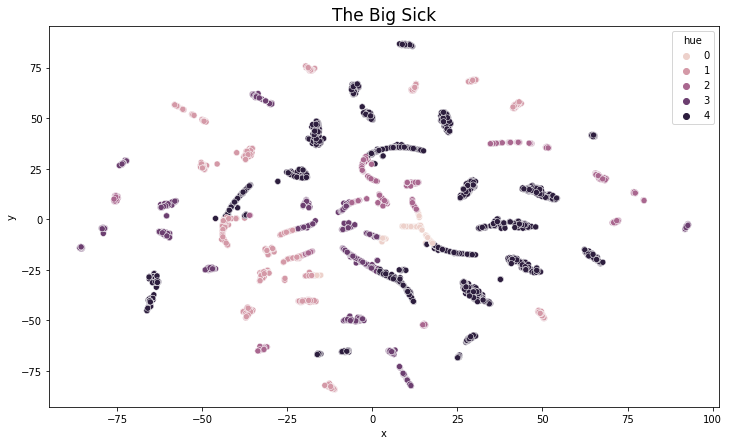

In [54]:
#plot of reduced dimensionality for the movie Big Sick
fig, ax = plt.subplots(figsize=(12, 7))
sns.scatterplot(
    x = "x", y="y",
    hue="hue",
    ax=ax,
    data=embedding)
plt.title('The Big Sick', fontsize = 17)
plt.savefig('images/tsne_bigsick.jpg')

# Gone Girl

## LDA

In [55]:
#read in Gone Girl csv
GoneGirl = pd.read_csv('GoneGirl.csv')
GoneGirl.drop(columns=['Unnamed: 0'], axis = 1, inplace = True)
GoneGirl.head()

,date,tweet,language,hashtags,username,link,retweet,nlikes,nreplies,nretweets,vader_score,positive sentiment score,negative sentiment score,neutral sentiment score,compound sentiment score
0,2015-10-01 19:49:05,(#UntilDawn spoilers) HE GONE GIRL'D HIS PHALA...,en,['untildawn'],bradyonetta,https://twitter.com/bradyonetta/status/6497327...,False,1,1,0,"{'neg': 0.299, 'neu': 0.701, 'pos': 0.0, 'comp...",0.000,0.299,0.701,-0.5904
1,2015-10-01 19:48:58,@chlomeganda gone girl chloeeee :),en,[],ChanwooCheeks,https://twitter.com/ChanwooCheeks/status/64973...,False,0,1,0,"{'neg': 0.0, 'neu': 0.571, 'pos': 0.429, 'comp...",0.429,0.000,0.571,0.4588
2,2015-10-01 19:48:09,"(#UntilDawn spoilers) OPEN THE BEAR TRAP, CRY....",en,['untildawn'],bradyonetta,https://twitter.com/bradyonetta/status/6497325...,False,0,1,0,"{'neg': 0.407, 'neu': 0.593, 'pos': 0.0, 'comp...",0.000,0.407,0.593,-0.7824
3,2015-10-01 19:46:52,Suspect indicted in Vallejo 'Gone Girl' kidnap...,en,[],OmarAzimi,https://twitter.com/OmarAzimi/status/649732240...,False,1,0,0,"{'neg': 0.104, 'neu': 0.896, 'pos': 0.0, 'comp...",0.000,0.104,0.896,-0.2960
4,2015-10-01 19:45:48,Gone Girl is a fucking crazy movie #thumbsup,en,['thumbsup'],kempatsu,https://twitter.com/kempatsu/status/6497319736...,False,1,0,0,"{'neg': 0.278, 'neu': 0.722, 'pos': 0.0, 'comp...",0.000,0.278,0.722,-0.4005


In [56]:
#tokenizing each tweet
tokenized_tweets_GoneGirl = []
for tweet in GoneGirl['tweet']:
    tokenized_tweets_GoneGirl.append(tokenizer.tokenize(tweet.lower())) #making all tweets lowercase so no word is duplicated later on
    
# tokenized_tweets_GoneGirl

In [57]:
#stemming each tweet
stemmed_tweets=[]
for tweet in tokenized_tweets_GoneGirl:
    stemmed_words = []
    for word in tweet:
        if word not in stopwords_list:
            stemmed_words.append(ps.stem(word))
    stemmed_tweets.append(stemmed_words)

# stemmed_tweets

In [58]:
#adding to Gone Girl dataframe 

#stemmed tweets list version
GoneGirl['stemmed'] = stemmed_tweets

#string version
stemmed_tweets_str_lst = []
for tweet in GoneGirl['stemmed'].tolist():
    stemmed_tweets_str_lst.append(" ".join(tweet))

GoneGirl['string_stemmed'] = stemmed_tweets_str_lst

GoneGirl.head()

,date,tweet,language,hashtags,username,link,retweet,nlikes,nreplies,nretweets,vader_score,positive sentiment score,negative sentiment score,neutral sentiment score,compound sentiment score,stemmed,string_stemmed
0,2015-10-01 19:49:05,(#UntilDawn spoilers) HE GONE GIRL'D HIS PHALA...,en,['untildawn'],bradyonetta,https://twitter.com/bradyonetta/status/6497327...,False,1,1,0,"{'neg': 0.299, 'neu': 0.701, 'pos': 0.0, 'comp...",0.000,0.299,0.701,-0.5904,"[untildawn, spoiler, gone, girl, phalang, enou...",untildawn spoiler gone girl phalang enough cri...
1,2015-10-01 19:48:58,@chlomeganda gone girl chloeeee :),en,[],ChanwooCheeks,https://twitter.com/ChanwooCheeks/status/64973...,False,0,1,0,"{'neg': 0.0, 'neu': 0.571, 'pos': 0.429, 'comp...",0.429,0.000,0.571,0.4588,"[chlomeganda, gone, girl, chloeeee]",chlomeganda gone girl chloeeee
2,2015-10-01 19:48:09,"(#UntilDawn spoilers) OPEN THE BEAR TRAP, CRY....",en,['untildawn'],bradyonetta,https://twitter.com/bradyonetta/status/6497325...,False,0,1,0,"{'neg': 0.407, 'neu': 0.593, 'pos': 0.0, 'comp...",0.000,0.407,0.593,-0.7824,"[untildawn, spoiler, open, bear, trap, cri, go...",untildawn spoiler open bear trap cri gone girl...
3,2015-10-01 19:46:52,Suspect indicted in Vallejo 'Gone Girl' kidnap...,en,[],OmarAzimi,https://twitter.com/OmarAzimi/status/649732240...,False,1,0,0,"{'neg': 0.104, 'neu': 0.896, 'pos': 0.0, 'comp...",0.000,0.104,0.896,-0.2960,"[suspect, indict, vallejo, gone, girl, kidnap,...",suspect indict vallejo gone girl kidnap case h...
4,2015-10-01 19:45:48,Gone Girl is a fucking crazy movie #thumbsup,en,['thumbsup'],kempatsu,https://twitter.com/kempatsu/status/6497319736...,False,1,0,0,"{'neg': 0.278, 'neu': 0.722, 'pos': 0.0, 'comp...",0.000,0.278,0.722,-0.4005,"[gone, girl, fuck, crazi, movi, thumbsup]",gone girl fuck crazi movi thumbsup


In [59]:
# sparse Document Term Matrix
vec = CountVectorizer(stop_words=stopwords_list)
X = vec.fit_transform(GoneGirl['string_stemmed'].tolist())
df = pd.DataFrame(X.toarray(), columns = vec.get_feature_names())
df.head()

,00,000th,01,02,039,04utpoqzdk,06izylta51,06zxxykdsj,07wgg3sjh9,08fi9pg6oi,...,zt,zta9g7kncl,ztksz6zurr,zulaikhafadir,zulfikamohd,zurich,zusak,zv7jly9wel,zvuwfji59v,zzts2ihfdp
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [60]:
#numbers to words dictionary
dictionary = corpora.Dictionary(GoneGirl['stemmed'])

In [61]:
#bag of words
corpus = []
for tweet in GoneGirl['stemmed']:
    corpus.append(dictionary.doc2bow(tweet))

In [62]:
#running LDA model
lda = models.LdaMulticore(corpus=corpus, id2word=dictionary, num_topics=5, passes=10)
for elem in lda.print_topics():
    print("Topic", elem[0], "\nWords:", elem[1])

Topic 0 
Words: 0.113*"girl" + 0.096*"gone" + 0.026*"read" + 0.020*"book" + 0.017*"gillian" + 0.017*"flynn" + 0.015*"train" + 0.013*"join" + 0.012*"qwqgukxak4" + 0.011*"love"
Topic 1 
Words: 0.056*"girl" + 0.053*"gone" + 0.028*"gonegirl" + 0.006*"gt" + 0.005*"ami" + 0.004*"benaffleck" + 0.004*"castl" + 0.004*"premier" + 0.004*"seen" + 0.004*"els"
Topic 2 
Words: 0.137*"girl" + 0.134*"gone" + 0.039*"movi" + 0.021*"watch" + 0.014*"good" + 0.012*"like" + 0.011*"fuck" + 0.010*"crazi" + 0.006*"time" + 0.006*"gonegirl"
Topic 3 
Words: 0.039*"girl" + 0.035*"gone" + 0.021*"gonegirl" + 0.010*"28" + 0.009*"ladymaryordi" + 0.008*"abeymarindo" + 0.007*"jaycahcomedia" + 0.005*"aldubebforlov" + 0.005*"watch" + 0.003*"like"
Topic 4 
Words: 0.097*"girl" + 0.095*"gone" + 0.070*"watch" + 0.019*"gonegirl" + 0.011*"time" + 0.009*"28" + 0.009*"ladymaryordi" + 0.009*"abeymarindo" + 0.007*"aldubebforlov" + 0.006*"film"


In [64]:
#Display Gone Girl LDA model
pyLDAvis.enable_notebook()
vis = pyLDAvis.gensim.prepare(lda, corpus, dictionary)
vis
# pyLDAvis.save_html(vis, 'images/lda_gonegirl.html')

PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
2     -0.102301  0.079671       1        1  40.632960
0     -0.096961 -0.125292       2        1  27.079019
4     -0.006877  0.078930       3        1  16.504547
1      0.085735 -0.016018       4        1   9.029102
3      0.120404 -0.017291       5        1   6.754373, topic_info=         Term        Freq       Total Category  logprob  loglift
98      watch  903.000000  903.000000  Default  30.0000  30.0000
26       movi  664.000000  664.000000  Default  29.0000  29.0000
43   gonegirl  463.000000  463.000000  Default  28.0000  28.0000
61       read  348.000000  348.000000  Default  27.0000  27.0000
36       book  272.000000  272.000000  Default  26.0000  26.0000
..        ...         ...         ...      ...      ...      ...
159      like    8.679193  282.715917   Topic5  -5.7364  -0.7885
178      2014    6.600008   74.048125   Topic5  -6.0102   0.2773
201      make    6.174373   78.605408   Topic5  -6.0769   0.1509
36       book    5.406971  272.406451   Topic5  -6.2096  -1.2246
61       read    5.169551  348.882520   Topic5  -6.2545  -1.5170

[336 rows x 6 columns], token_table=      Topic      Freq    Term
term                         
275       2  0.985497      11
178       1  0.594208    2014
178       2  0.094533    2014
178       3  0.027009    2014
178       4  0.175562    2014
...     ...       ...     ...
486       2  0.103851    year
486       4  0.207701    year
486       5  0.145391    year
673       1  0.887165  youtub
673       2  0.105615  youtub

[610 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[3, 1, 5, 2, 4])

## TSNE 

In [65]:
#create matrix
X = []
for i in range(len(corpus)):
    if len(lda[corpus[i]]) == 5:
        X.append([y for (x,y) in lda[corpus[i]]])
        
# X

In [66]:
#reduce dimensionality
tsne = TSNE(n_components=2, random_state=27)
embedding = tsne.fit_transform(np.array(X))
embedding = pd.DataFrame(embedding, columns=['x','y'])
embedding['hue'] = np.array(X).argmax(axis=1)

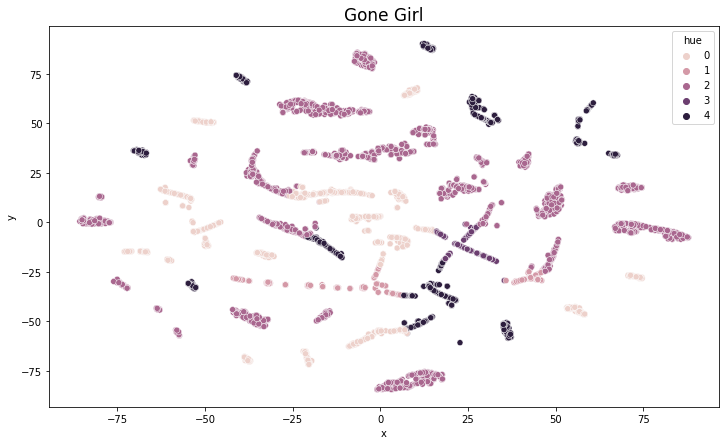

In [68]:
#plot of reduced dimensionality for Gone Girl
fig, ax = plt.subplots(figsize=(12,7))
sns.scatterplot(
    x = "x", y="y",
    hue="hue",
    ax = ax,
    data=embedding)
plt.title('Gone Girl', fontsize = 17)
plt.savefig('images/tsne_gonegirl.jpg')

# 17 Again

## LDA 

In [69]:
#read in 17 Again
Again17 = pd.read_csv('Again17.csv')
Again17.drop(columns=['Unnamed: 0'], axis = 1, inplace = True)
Again17.head()

,date,tweet,language,hashtags,username,link,retweet,nlikes,nreplies,nretweets,vader_score,positive sentiment score,negative sentiment score,neutral sentiment score,compound sentiment score
0,2010-04-12 19:44:15,http://bit.ly/bqye6j where can i get a dress ...,en,[],MarleneJenkins,https://twitter.com/MarleneJenkins/status/1207...,False,0,0,0,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.000,0.000,1.000,0.0000
1,2010-04-12 19:28:20,watching 17 Again. :) i missed this movie.,en,[],EuniceHilario,https://twitter.com/EuniceHilario/status/12072...,False,0,0,0,"{'neg': 0.196, 'neu': 0.536, 'pos': 0.268, 'co...",0.268,0.196,0.536,0.2023
2,2010-04-12 19:27:47,"@conallen haha not surprising. ""17 Again"" seem...",en,[],sunnyjac0b,https://twitter.com/sunnyjac0b/status/12072044784,False,0,0,0,"{'neg': 0.076, 'neu': 0.675, 'pos': 0.249, 'co...",0.249,0.076,0.675,0.6232
3,2010-04-12 19:25:32,"@tjlyricz just gonna watch 17 again, and you g...",en,[],desireefurlong,https://twitter.com/desireefurlong/status/1207...,False,0,0,0,"{'neg': 0.0, 'neu': 0.864, 'pos': 0.136, 'comp...",0.136,0.000,0.864,0.4588
4,2010-04-12 19:21:54,@jacobjunior7 yeah more boyish then which is w...,en,[],conallen,https://twitter.com/conallen/status/12071772509,False,0,0,0,"{'neg': 0.082, 'neu': 0.709, 'pos': 0.21, 'com...",0.210,0.082,0.709,0.4552


In [70]:
#tokenizing each tweet
tokenized_tweets_17Again = []
for tweet in Again17['tweet']:
    tokenized_tweets_17Again.append(tokenizer.tokenize(tweet.lower())) #making all tweets lowercase so no word is duplicated later on
    
# tokenized_tweets_17Again

In [71]:
#stemming tweets
stemmed_tweets=[]
for tweet in tokenized_tweets_17Again:
    stemmed_words = []
    for word in tweet:
        if word not in stopwords_list:
            stemmed_words.append(ps.stem(word))
    stemmed_tweets.append(stemmed_words)

# stemmed_tweets

In [72]:
#adding to 17 Again to dataframe 

#stemmed tweets list version
Again17['stemmed'] = stemmed_tweets

#string version
stemmed_tweets_str_lst = []
for tweet in Again17['stemmed'].tolist():
    stemmed_tweets_str_lst.append(" ".join(tweet))

Again17['string_stemmed'] = stemmed_tweets_str_lst

Again17.head()

,date,tweet,language,hashtags,username,link,retweet,nlikes,nreplies,nretweets,vader_score,positive sentiment score,negative sentiment score,neutral sentiment score,compound sentiment score,stemmed,string_stemmed
0,2010-04-12 19:44:15,http://bit.ly/bqye6j where can i get a dress ...,en,[],MarleneJenkins,https://twitter.com/MarleneJenkins/status/1207...,False,0,0,0,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.000,0.000,1.000,0.0000,"[bit, bqye6j, dress, similar, zac, posen, dres...",bit bqye6j dress similar zac posen dress vanes...
1,2010-04-12 19:28:20,watching 17 Again. :) i missed this movie.,en,[],EuniceHilario,https://twitter.com/EuniceHilario/status/12072...,False,0,0,0,"{'neg': 0.196, 'neu': 0.536, 'pos': 0.268, 'co...",0.268,0.196,0.536,0.2023,"[watch, 17, miss, movi]",watch 17 miss movi
2,2010-04-12 19:27:47,"@conallen haha not surprising. ""17 Again"" seem...",en,[],sunnyjac0b,https://twitter.com/sunnyjac0b/status/12072044784,False,0,0,0,"{'neg': 0.076, 'neu': 0.675, 'pos': 0.249, 'co...",0.249,0.076,0.675,0.6232,"[conallen, haha, surpris, 17, seem, trigger, q...",conallen haha surpris 17 seem trigger quit con...
3,2010-04-12 19:25:32,"@tjlyricz just gonna watch 17 again, and you g...",en,[],desireefurlong,https://twitter.com/desireefurlong/status/1207...,False,0,0,0,"{'neg': 0.0, 'neu': 0.864, 'pos': 0.136, 'comp...",0.136,0.000,0.864,0.4588,"[tjlyricz, gonna, watch, 17, gotta, loov, late...",tjlyricz gonna watch 17 gotta loov late night ...
4,2010-04-12 19:21:54,@jacobjunior7 yeah more boyish then which is w...,en,[],conallen,https://twitter.com/conallen/status/12071772509,False,0,0,0,"{'neg': 0.082, 'neu': 0.709, 'pos': 0.21, 'com...",0.210,0.082,0.709,0.4552,"[jacobjunior7, yeah, boyish, realli, pay, atte...",jacobjunior7 yeah boyish realli pay attent saw...


In [73]:
# sparse Document Term Matrix
vec = CountVectorizer(stop_words=stopwords_list)
X = vec.fit_transform(Again17['string_stemmed'].tolist())
df = pd.DataFrame(X.toarray(), columns = vec.get_feature_names())
df.head()

,00,01,02,021010,03,04,05,06,07,08,...,zoeblais2010zo,zomg,zone,zoo,zoom,zoradarosa,zqaddict,zxfsb,zzzdaria,zzzzz
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [74]:
#dictionary of numbers to words
dictionary = corpora.Dictionary(Again17['stemmed'])

In [75]:
#bag of words (tokenid, tokencount)
corpus = []
for tweet in Again17['stemmed']:
    corpus.append(dictionary.doc2bow(tweet))

In [76]:
#running LDA model for the movie 17 Again
lda = models.LdaMulticore(corpus=corpus, id2word=dictionary, num_topics=5, passes=10)
for elem in lda.print_topics():
    print("Topic", elem[0], "\nWords:", elem[1])

Topic 0 
Words: 0.092*"17" + 0.054*"watch" + 0.026*"3" + 0.014*"lol" + 0.010*"17again" + 0.009*"movi" + 0.008*"watchin" + 0.008*"think" + 0.008*"haha" + 0.007*"love"
Topic 1 
Words: 0.133*"17" + 0.057*"watch" + 0.024*"zoeblai" + 0.015*"zac" + 0.014*"movi" + 0.012*"4" + 0.011*"efron" + 0.011*"beauti" + 0.011*"win" + 0.010*"tweet"
Topic 2 
Words: 0.111*"17" + 0.038*"watch" + 0.033*"movi" + 0.024*"love" + 0.022*"zac" + 0.021*"efron" + 0.014*"like" + 0.008*"lol" + 0.008*"bit" + 0.007*"feel"
Topic 3 
Words: 0.071*"17" + 0.026*"like" + 0.022*"movi" + 0.013*"watch" + 0.012*"feel" + 0.008*"lol" + 0.008*"time" + 0.008*"q" + 0.006*"good" + 0.006*"zac"
Topic 4 
Words: 0.100*"17" + 0.045*"watch" + 0.030*"zac" + 0.026*"efron" + 0.016*"movi" + 0.016*"good" + 0.008*"lol" + 0.008*"pretti" + 0.008*"17again" + 0.007*"3"


In [78]:
#display LDA model for the movie 17 Again
pyLDAvis.enable_notebook()
vis = pyLDAvis.gensim.prepare(lda, corpus, dictionary)
vis
# pyLDAvis.save_html(vis, 'images/lda_17again.html')

PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
2     -0.002880  0.061008       1        1  32.076461
1     -0.129947 -0.002307       2        1  23.812635
4     -0.006493 -0.014461       3        1  22.661178
0      0.053866 -0.112783       4        1  11.038605
3      0.085453  0.068543       5        1  10.411120, topic_info=         Term         Freq        Total Category  logprob  loglift
4943  zoeblai   236.000000   236.000000  Default  30.0000  30.0000
108         3   183.000000   183.000000  Default  29.0000  29.0000
13      watch  1743.000000  1743.000000  Default  28.0000  28.0000
0          17  4342.000000  4342.000000  Default  27.0000  27.0000
48       like   420.000000   420.000000  Default  26.0000  26.0000
...       ...          ...          ...      ...      ...      ...
1         bit    14.973618   153.176878   Topic5  -5.6384  -0.0630
435      know    11.572709    74.960169   Topic5  -5.8961   0.3940
417      seen    10.946840    72.094958   Topic5  -5.9517   0.3774
32         go    10.996904   155.605299   Topic5  -5.9471  -0.3874
487   watchin    10.969708   159.623809   Topic5  -5.9496  -0.4154

[360 rows x 6 columns], token_table=      Topic      Freq     Term
term                          
4956      2  0.989606    100th
0         1  0.331626       17
0         2  0.293858       17
0         3  0.211182       17
0         4  0.094421       17
...     ...       ...      ...
868       1  0.947883     zach
993       1  0.920259     zack
993       2  0.038344     zack
993       4  0.038344     zack
4943      2  0.997467  zoeblai

[685 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[3, 2, 5, 1, 4])

## TSNE 

In [79]:
#LDA matrix results
X = []
for i in range(len(corpus)):
    if len(lda[corpus[i]]) == 5:
        X.append([y for (x,y) in lda[corpus[i]]])
        
# X

In [80]:
#reduce dimensionality
tsne = TSNE(n_components=2, random_state=27)
embedding = tsne.fit_transform(np.array(X))
embedding = pd.DataFrame(embedding, columns=['x','y'])
embedding['hue'] = np.array(X).argmax(axis=1)

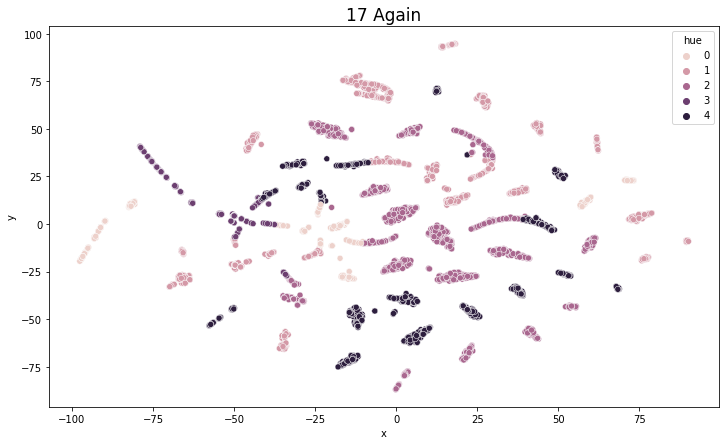

In [81]:
#plot reduce dimensionality for the movie 17 Again
fig, ax = plt.subplots(figsize=(12,7))
sns.scatterplot(
    x = "x", y="y",
    hue="hue",
    data=embedding)
plt.title('17 Again', fontsize = 17)
plt.savefig('images/tsne_17again')

# Jennifer's Body

## LDA 

In [82]:
#read in the Big Sick
JennifersBody = pd.read_csv('JennifersBody.csv')
JennifersBody.drop(columns=['Unnamed: 0'], axis = 1, inplace = True) 
JennifersBody.head()

,date,tweet,language,hashtags,username,link,retweet,nlikes,nreplies,nretweets,vader_score,positive sentiment score,negative sentiment score,neutral sentiment score,compound sentiment score
0,2010-09-16 19:57:28,I'll wear my Jennifer's Body shirt and red and...,en,[],gogoalexranger,https://twitter.com/gogoalexranger/status/2470...,False,0,0,0,"{'neg': 0.0, 'neu': 0.811, 'pos': 0.189, 'comp...",0.189,0.000,0.811,0.5411
1,2010-09-16 18:40:07,"Watching Jennifer's Body with Erin & Jess, the...",en,[],dull_life,https://twitter.com/dull_life/status/24703649087,False,0,0,0,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.000,0.000,1.000,0.0000
2,2010-09-16 17:22:37,Ok I just threw up some black ropey stuff like...,en,[],advocatediaboli,https://twitter.com/advocatediaboli/status/246...,False,0,0,0,"{'neg': 0.29, 'neu': 0.532, 'pos': 0.178, 'com...",0.178,0.290,0.532,-0.6037
3,2010-09-16 16:59:37,The Jennifer's Body soundtrack is so good. If ...,en,[],TheKatValentine,https://twitter.com/TheKatValentine/status/246...,False,0,0,0,"{'neg': 0.0, 'neu': 0.777, 'pos': 0.223, 'comp...",0.223,0.000,0.777,0.5777
4,2010-09-16 16:05:32,'Jennifer's body' is possibly one of the worst...,en,[],_BeckyHart,https://twitter.com/_BeckyHart/status/24693353486,False,0,0,0,"{'neg': 0.258, 'neu': 0.742, 'pos': 0.0, 'comp...",0.000,0.258,0.742,-0.8070


In [83]:
#tokenizing each tweet
tokenized_tweets = []
for tweet in JennifersBody['tweet']:
    tokenized_tweets.append(tokenizer.tokenize(tweet.lower())) #making all tweets lowercase so no word is duplicated later on
    
# tokenized_tweets

In [84]:
#stemming tweets
stemmed_tweets=[]
for tweet in tokenized_tweets:
    stemmed_words = []
    for word in tweet:
        if word not in stopwords_list:
            stemmed_words.append(ps.stem(word))
    stemmed_tweets.append(stemmed_words)

# stemmed_tweets

In [85]:
#adding to Jennifer's Body dataframe 

#stemmed tweets list version
JennifersBody['stemmed'] = stemmed_tweets

#string version
stemmed_tweets_str_lst = []
for tweet in JennifersBody['stemmed'].tolist():
    stemmed_tweets_str_lst.append(" ".join(tweet))

JennifersBody['string_stemmed'] = stemmed_tweets_str_lst

JennifersBody.head()

,date,tweet,language,hashtags,username,link,retweet,nlikes,nreplies,nretweets,vader_score,positive sentiment score,negative sentiment score,neutral sentiment score,compound sentiment score,stemmed,string_stemmed
0,2010-09-16 19:57:28,I'll wear my Jennifer's Body shirt and red and...,en,[],gogoalexranger,https://twitter.com/gogoalexranger/status/2470...,False,0,0,0,"{'neg': 0.0, 'neu': 0.811, 'pos': 0.189, 'comp...",0.189,0.000,0.811,0.5411,"[wear, jennif, bodi, shirt, red, black, scarf,...",wear jennif bodi shirt red black scarf tomorro...
1,2010-09-16 18:40:07,"Watching Jennifer's Body with Erin & Jess, the...",en,[],dull_life,https://twitter.com/dull_life/status/24703649087,False,0,0,0,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.000,0.000,1.000,0.0000,"[watch, jennif, bodi, erin, jess, make, breakf...",watch jennif bodi erin jess make breakfast din...
2,2010-09-16 17:22:37,Ok I just threw up some black ropey stuff like...,en,[],advocatediaboli,https://twitter.com/advocatediaboli/status/246...,False,0,0,0,"{'neg': 0.29, 'neu': 0.532, 'pos': 0.178, 'com...",0.178,0.290,0.532,-0.6037,"[ok, threw, black, ropey, stuff, like, jennif,...",ok threw black ropey stuff like jennif bodi st...
3,2010-09-16 16:59:37,The Jennifer's Body soundtrack is so good. If ...,en,[],TheKatValentine,https://twitter.com/TheKatValentine/status/246...,False,0,0,0,"{'neg': 0.0, 'neu': 0.777, 'pos': 0.223, 'comp...",0.223,0.000,0.777,0.5777,"[jennif, bodi, soundtrack, good, movi, decent]",jennif bodi soundtrack good movi decent
4,2010-09-16 16:05:32,'Jennifer's body' is possibly one of the worst...,en,[],_BeckyHart,https://twitter.com/_BeckyHart/status/24693353486,False,0,0,0,"{'neg': 0.258, 'neu': 0.742, 'pos': 0.0, 'comp...",0.000,0.258,0.742,-0.8070,"[jennif, bodi, possibl, one, worst, film, watc...",jennif bodi possibl one worst film watch year ...


In [86]:
# sparse Document Term Matrix
vec = CountVectorizer(stop_words=stopwords_list)
X = vec.fit_transform(JennifersBody['string_stemmed'].tolist())
df = pd.DataFrame(X.toarray(), columns = vec.get_feature_names())
df.head()

,00,000,01,02,03,039,06,07,08,09,...,zhane,zig,zk3y3icz,zombi,zombieland,zondara,zone,zooland,zq,zulhamyoga
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [87]:
#dictionary of numbers to words
dictionary = corpora.Dictionary(JennifersBody['stemmed'])

In [88]:
#list of words to bag of words format
corpus = []
for tweet in JennifersBody['stemmed']:
    corpus.append(dictionary.doc2bow(tweet))

In [89]:
#run LDA model for Jennifer's Body
lda = models.LdaMulticore(corpus=corpus, id2word=dictionary, num_topics=5, passes=10)
for elem in lda.print_topics():
    print("Topic", elem[0], "\nWords:", elem[1])

Topic 0 
Words: 0.027*"jennif" + 0.027*"bodi" + 0.006*"old" + 0.005*"armani" + 0.004*"bit" + 0.004*"ad" + 0.004*"underwear" + 0.004*"explor" + 0.003*"yo" + 0.003*"get"
Topic 1 
Words: 0.115*"bodi" + 0.114*"jennif" + 0.044*"watch" + 0.038*"movi" + 0.014*"like" + 0.009*"fox" + 0.008*"good" + 0.008*"time" + 0.008*"love" + 0.007*"megan"
Topic 2 
Words: 0.073*"jennif" + 0.072*"bodi" + 0.036*"megan" + 0.035*"fox" + 0.026*"watch" + 0.019*"bit" + 0.014*"choic" + 0.011*"love" + 0.011*"horror" + 0.011*"adam"
Topic 3 
Words: 0.138*"bodi" + 0.138*"jennif" + 0.068*"watch" + 0.011*"movi" + 0.010*"lol" + 0.009*"watchin" + 0.005*"good" + 0.005*"39" + 0.004*"go" + 0.004*"finish"
Topic 4 
Words: 0.098*"jennif" + 0.097*"bodi" + 0.031*"movi" + 0.025*"megan" + 0.025*"fox" + 0.019*"watch" + 0.011*"nowwatch" + 0.008*"seen" + 0.008*"stupid" + 0.007*"bit"


In [90]:
#display LDA model for Jennifer's Body
pyLDAvis.enable_notebook()
vis = pyLDAvis.gensim.prepare(lda, corpus, dictionary)
vis
# pyLDAvis.save_html(vis, 'images/lda_jennifersbody.html')

PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
1     -0.079354  0.035658       1        1  36.887117
3     -0.052348  0.074859       2        1  24.367810
4     -0.049852 -0.013735       3        1  21.209521
2     -0.002326 -0.128137       4        1  13.854331
0      0.183879  0.031355       5        1   3.681222, topic_info=       Term         Freq        Total Category  logprob  loglift
112   megan   582.000000   582.000000  Default  30.0000  30.0000
43      fox   592.000000   592.000000  Default  29.0000  29.0000
15    watch  1741.000000  1741.000000  Default  28.0000  28.0000
207     bit   239.000000   239.000000  Default  27.0000  27.0000
2    jennif  4625.000000  4625.000000  Default  26.0000  26.0000
..      ...          ...          ...      ...      ...      ...
863   start     2.581508    26.475165   Topic5  -6.4191   0.9741
15    watch     2.925839  1741.275271   Topic5  -6.2938  -3.0869
30     film     2.634538    87.727051   Topic5  -6.3987  -0.2036
334   guess     2.416449    24.091183   Topic5  -6.4851   1.0024
132     hbo     2.374075    45.553932   Topic5  -6.5028   0.3476

[357 rows x 6 columns], token_table=      Topic      Freq        Term
term                             
2961      3  0.128355          09
2961      4  0.770133          09
5426      3  0.821123         124
4765      4  0.927217          18
2683      3  0.820594         188
...     ...       ...         ...
3577      2  0.933073        xvid
908       2  0.303980          yo
908       3  0.364776          yo
908       5  0.303980          yo
504       2  0.896897  zombieland

[643 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[2, 4, 5, 3, 1])

## TSNE 

In [91]:
#reduce dimensionality
X = []
for i in range(len(corpus)):
    if len(lda[corpus[i]]) == 5:
        X.append([y for (x,y) in lda[corpus[i]]])
        
# X

In [92]:
#reduce dimensionality
tsne = TSNE(n_components=2, random_state=27)
embedding = tsne.fit_transform(np.array(X))
embedding = pd.DataFrame(embedding, columns=['x','y'])
embedding['hue'] = np.array(X).argmax(axis=1)

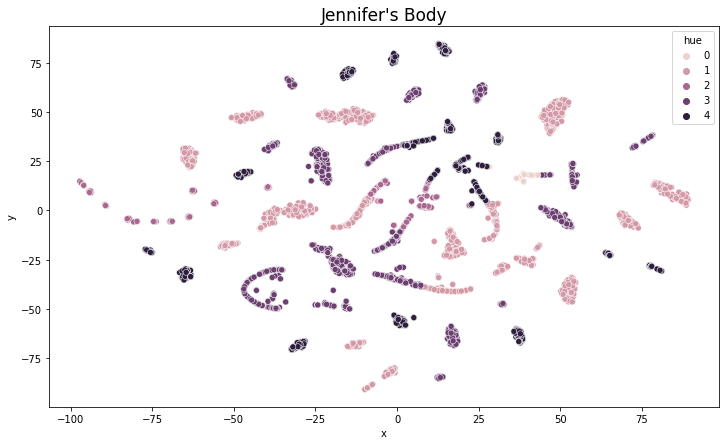

In [93]:
# Jennifer's Body plot of reduced dimensionality
fig, ax = plt.subplots(figsize = (12,7))
sns.scatterplot(
    x = "x", y="y",
    hue="hue",
    data=embedding,
    ax = ax)
plt.title("Jennifer's Body", fontsize = 17)
plt.savefig('images/tsne_jennifersbody.jpg')

# The Shape of Water

## LDA

In [94]:
#read in The Shape of Water
ShapeOfWater = pd.read_csv('ShapeOfWater.csv')
ShapeOfWater.drop(columns=['Unnamed: 0'], axis = 1, inplace = True) 
ShapeOfWater.head()

,date,tweet,language,hashtags,username,link,retweet,nlikes,nreplies,nretweets,vader_score,positive sentiment score,negative sentiment score,neutral sentiment score,compound sentiment score
0,2018-08-29 19:59:28,Fab and I watching shape of water together and...,en,[],kjimuseum,https://twitter.com/kjimuseum/status/103495371...,False,1,0,0,"{'neg': 0.115, 'neu': 0.697, 'pos': 0.188, 'co...",0.188,0.115,0.697,0.2732
1,2018-08-29 19:43:01,📷 hellohousemouse: the shape of water model: ...,en,[],annestaggwrites,https://twitter.com/annestaggwrites/status/103...,False,0,0,0,"{'neg': 0.0, 'neu': 0.782, 'pos': 0.218, 'comp...",0.218,0.000,0.782,0.5994
2,2018-08-29 19:39:36,"""The Shape of Water is like alien Amelie, but ...",en,[],TheGreenGreek,https://twitter.com/TheGreenGreek/status/10349...,False,2,0,0,"{'neg': 0.241, 'neu': 0.586, 'pos': 0.173, 'co...",0.173,0.241,0.586,-0.4953
3,2018-08-29 19:38:41,@CharlieWSwain That couple in “The Shape Of Wa...,en,[],cliffmarshall,https://twitter.com/cliffmarshall/status/10349...,False,1,0,0,"{'neg': 0.0, 'neu': 0.909, 'pos': 0.091, 'comp...",0.091,0.000,0.909,0.2960
4,2018-08-29 19:37:09,"More power to him. Sure beats the spew, prais...",en,[],biomom64,https://twitter.com/biomom64/status/1034948099...,False,0,0,0,"{'neg': 0.0, 'neu': 0.812, 'pos': 0.188, 'comp...",0.188,0.000,0.812,0.7003


In [95]:
#tokenizing each tweet
tokenized_tweets = []
for tweet in ShapeOfWater['tweet']:
    tokenized_tweets.append(tokenizer.tokenize(tweet.lower())) #making all tweets lowercase so no word is duplicated later on
# tokenized_tweets

In [96]:
#stemming tweets
stemmed_tweets=[]
for tweet in tokenized_tweets:
    stemmed_words = []
    for word in tweet:
        if word not in stopwords_list:
            stemmed_words.append(ps.stem(word))
    stemmed_tweets.append(stemmed_words)
# stemmed_tweets

In [97]:
#adding to The Shape of Water dataframe 

#stemmed tweets list version
ShapeOfWater['stemmed'] = stemmed_tweets

#string version
stemmed_tweets_str_lst = []
for tweet in ShapeOfWater['stemmed'].tolist():
    stemmed_tweets_str_lst.append(" ".join(tweet))

ShapeOfWater['string_stemmed'] = stemmed_tweets_str_lst

ShapeOfWater.head()

,date,tweet,language,hashtags,username,link,retweet,nlikes,nreplies,nretweets,vader_score,positive sentiment score,negative sentiment score,neutral sentiment score,compound sentiment score,stemmed,string_stemmed
0,2018-08-29 19:59:28,Fab and I watching shape of water together and...,en,[],kjimuseum,https://twitter.com/kjimuseum/status/103495371...,False,1,0,0,"{'neg': 0.115, 'neu': 0.697, 'pos': 0.188, 'co...",0.188,0.115,0.697,0.2732,"[fab, watch, shape, water, togeth, hate, heada...",fab watch shape water togeth hate headass must...
1,2018-08-29 19:43:01,📷 hellohousemouse: the shape of water model: ...,en,[],annestaggwrites,https://twitter.com/annestaggwrites/status/103...,False,0,0,0,"{'neg': 0.0, 'neu': 0.782, 'pos': 0.218, 'comp...",0.218,0.000,0.782,0.5994,"[hellohousemous, shape, water, model, averi, v...",hellohousemous shape water model averi vulp ro...
2,2018-08-29 19:39:36,"""The Shape of Water is like alien Amelie, but ...",en,[],TheGreenGreek,https://twitter.com/TheGreenGreek/status/10349...,False,2,0,0,"{'neg': 0.241, 'neu': 0.586, 'pos': 0.173, 'co...",0.173,0.241,0.586,-0.4953,"[shape, water, like, alien, ameli, ameli, bett...",shape water like alien ameli ameli better stil...
3,2018-08-29 19:38:41,@CharlieWSwain That couple in “The Shape Of Wa...,en,[],cliffmarshall,https://twitter.com/cliffmarshall/status/10349...,False,1,0,0,"{'neg': 0.0, 'neu': 0.909, 'pos': 0.091, 'comp...",0.091,0.000,0.909,0.2960,"[charliewswain, coupl, shape, water, babi, gre...",charliewswain coupl shape water babi grew beco...
4,2018-08-29 19:37:09,"More power to him. Sure beats the spew, prais...",en,[],biomom64,https://twitter.com/biomom64/status/1034948099...,False,0,0,0,"{'neg': 0.0, 'neu': 0.812, 'pos': 0.188, 'comp...",0.188,0.000,0.812,0.7003,"[power, sure, beat, spew, prais, trump, come, ...",power sure beat spew prais trump come costar s...


In [98]:
# sparse Document Term Matrix
vec = CountVectorizer(stop_words=stopwords_list)
X = vec.fit_transform(ShapeOfWater['string_stemmed'].tolist())
df = pd.DataFrame(X.toarray(), columns = vec.get_feature_names())
df.head()

,00,000x,00pm,01297,01425612393,018,02,0215madman,02mvwewkxo,03,...,ztq9uerwad,ztxmxhuphw,zujbgxhisa,zuldim,zvk56tlfg6,zvkewslwtd,zyli,zymmetra,zyrtigppmr,zzck2vlrfz
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [99]:
#dictionary of numbers to words
dictionary = corpora.Dictionary(ShapeOfWater['stemmed'])

In [100]:
#bag of words (tokenid, tokencount)
corpus = []
for tweet in ShapeOfWater['stemmed']:
    corpus.append(dictionary.doc2bow(tweet))

In [101]:
#run LDA model for the movie The Shape of Water
lda = models.LdaMulticore(corpus=corpus, id2word=dictionary, num_topics=5, passes=10)
for elem in lda.print_topics(-1):
    print("Topic", elem[0], "\nWords:", elem[1])

Topic 0 
Words: 0.087*"water" + 0.086*"shape" + 0.014*"movi" + 0.012*"watch" + 0.011*"like" + 0.010*"del" + 0.010*"toro" + 0.009*"film" + 0.009*"guillermo" + 0.007*"nanotub"
Topic 1 
Words: 0.032*"water" + 0.032*"shape" + 0.009*"ladi" + 0.009*"3" + 0.008*"bird" + 0.007*"1" + 0.007*"5" + 0.007*"2" + 0.006*"thread" + 0.006*"4"
Topic 2 
Words: 0.037*"water" + 0.037*"shape" + 0.009*"win" + 0.007*"prize" + 0.007*"giveaway" + 0.007*"comp" + 0.006*"watch" + 0.005*"blu" + 0.005*"ray" + 0.005*"love"
Topic 3 
Words: 0.082*"shape" + 0.081*"water" + 0.014*"watch" + 0.011*"movi" + 0.008*"love" + 0.006*"like" + 0.005*"one" + 0.004*"fuck" + 0.004*"realli" + 0.004*"monster"
Topic 4 
Words: 0.054*"water" + 0.053*"shape" + 0.018*"film" + 0.014*"movi" + 0.012*"best" + 0.011*"oscar" + 0.008*"2017" + 0.008*"pictur" + 0.007*"year" + 0.007*"like"


In [102]:
#display LDA model for The Shape of Water
pyLDAvis.enable_notebook()
vis = pyLDAvis.gensim.prepare(lda, corpus, dictionary)
vis
# pyLDAvis.save_html(vis, 'images/lda_shapeofwater.html')

PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
0      0.084844 -0.011509       1        1  37.471558
4      0.044797  0.040150       2        1  22.752129
3      0.067444 -0.022787       3        1  22.101260
1     -0.097881  0.101366       4        1  10.316201
2     -0.099204 -0.107219       5        1   7.358851, topic_info=         Term         Freq        Total Category  logprob  loglift
7       shape  4483.000000  4483.000000  Default  30.0000  30.0000
10      water  4511.000000  4511.000000  Default  29.0000  29.0000
127   nanotub   180.000000   180.000000  Default  28.0000  28.0000
125     chang   180.000000   180.000000  Default  27.0000  27.0000
26        win   141.000000   141.000000  Default  26.0000  26.0000
...       ...          ...          ...      ...      ...      ...
1020    white     8.517926    33.814103   Topic5  -6.3391   1.2306
198         4     9.588939    76.175872   Topic5  -6.2206   0.5368
99       film    11.987109   569.672413   Topic5  -5.9974  -1.2520
54        one    10.769368   242.619973   Topic5  -6.1045  -0.5055
53       movi    11.517097   751.329871   Topic5  -6.0374  -1.5687

[388 rows x 6 columns], token_table=      Topic      Freq    Term
term                         
226       1  0.012379       1
226       2  0.185685       1
226       3  0.074274       1
226       4  0.594191       1
226       5  0.136169       1
...     ...       ...     ...
60        5  0.005641    year
780       1  0.837615  youtub
780       2  0.015229  youtub
780       3  0.030459  youtub
780       5  0.106605  youtub

[783 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[1, 5, 4, 2, 3])

## TSNE 

In [119]:
#create LDA topic words matrix
X = []
for i in range(len(corpus)):
    if len(lda[corpus[i]]) == 5:
        X.append([y for (x,y) in lda[corpus[i]]])        
# X

In [120]:
#reduce dimensionality
tsne = TSNE(n_components=2, random_state=27)
embedding = tsne.fit_transform(np.array(X))
embedding = pd.DataFrame(embedding, columns=['x','y'])
embedding['hue'] = np.array(X).argmax(axis=1)

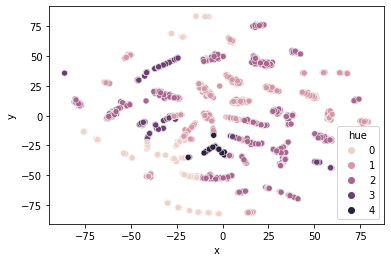

In [121]:
#plot of reduced dimensionality for The Shape of Water
fig, ax = plt.subplots(figsize = (12,7))
sns.scatterplot(
    x = "x", y="y",
    hue="hue",
    data=embedding,
    ax=ax)
plt.title('The Shape of Water', fontsize = 17)
plt.savefig('images/tsne_shapeofwater.jpg')

# The Big Short

## LDA 

In [122]:
#read in the Big Sick
BigShort = pd.read_csv('BigShort.csv')
BigShort.drop(columns=['Unnamed: 0'], axis = 1, inplace = True) 
BigShort.head()

,date,tweet,language,hashtags,username,link,retweet,nlikes,nreplies,nretweets,vader_score,positive sentiment score,negative sentiment score,neutral sentiment score,compound sentiment score
0,2016-12-09 18:57:58,"Just watched The Big Short. Fascinating film, ...",en,['thebigshort'],steveyroyal,https://twitter.com/steveyroyal/status/8073737...,False,0,0,0,"{'neg': 0.113, 'neu': 0.755, 'pos': 0.132, 'co...",0.132,0.113,0.755,0.1280
1,2016-12-09 18:57:57,Roger Ailes-Megyn Kelly Harassment Film in the...,en,[],RazzleTazzleMag,https://twitter.com/RazzleTazzleMag/status/807...,False,0,0,0,"{'neg': 0.194, 'neu': 0.722, 'pos': 0.083, 'co...",0.083,0.194,0.722,-0.4588
2,2016-12-09 18:56:04,The Big Short: is the next financial crisis on...,en,[],Okavangomick,https://twitter.com/Okavangomick/status/807373...,False,0,0,0,"{'neg': 0.272, 'neu': 0.728, 'pos': 0.0, 'comp...",0.000,0.272,0.728,-0.6249
3,2016-12-09 18:48:46,@BreitbartNews will it be call the Big Short I...,en,[],TimHay8,https://twitter.com/TimHay8/status/80737143968...,False,0,0,0,"{'neg': 0.101, 'neu': 0.899, 'pos': 0.0, 'comp...",0.000,0.101,0.899,-0.3089
4,2016-12-09 18:34:58,Rewatching The Big Short. Maybe you should too...,en,[],krucoff,https://twitter.com/krucoff/status/80736796980...,False,3,0,0,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.000,0.000,1.000,0.0000


In [123]:
#tokenizing each tweet
tokenized_tweets = []
for tweet in BigShort['tweet']:
    tokenized_tweets.append(tokenizer.tokenize(tweet.lower())) #making all tweets lowercase so no word is duplicated later on
# tokenized_tweets

In [124]:
from nltk.stem import WordNetLemmatizer 
lemmatizer = WordNetLemmatizer() 

#lemmatize tweets
lemmatized_tweets=[]
for tweet in tokenized_tweets:
    lemmatized_words = []
    for word in tweet:
        if word not in stopwords_list:
            lemmatized_words.append(lemmatizer.lemmatize(word))
    lemmatized_tweets.append(lemmatized_words)

# lemmatized_tweets

In [125]:
#adding to Big Short dataframe 

#lemmatized tweets list version
BigShort['lemmatize'] = lemmatized_tweets

#string version
lemmatized_tweets_str_lst = []
for tweet in BigShort['lemmatize'].tolist():
    lemmatized_tweets_str_lst.append(" ".join(tweet))

BigShort['string_lemmatized'] = lemmatized_tweets_str_lst

BigShort.head()

,date,tweet,language,hashtags,username,link,retweet,nlikes,nreplies,nretweets,vader_score,positive sentiment score,negative sentiment score,neutral sentiment score,compound sentiment score,lemmatize,string_lemmatized
0,2016-12-09 18:57:58,"Just watched The Big Short. Fascinating film, ...",en,['thebigshort'],steveyroyal,https://twitter.com/steveyroyal/status/8073737...,False,0,0,0,"{'neg': 0.113, 'neu': 0.755, 'pos': 0.132, 'co...",0.132,0.113,0.755,0.1280,"[watched, big, short, fascinating, film, even,...",watched big short fascinating film even compre...
1,2016-12-09 18:57:57,Roger Ailes-Megyn Kelly Harassment Film in the...,en,[],RazzleTazzleMag,https://twitter.com/RazzleTazzleMag/status/807...,False,0,0,0,"{'neg': 0.194, 'neu': 0.722, 'pos': 0.083, 'co...",0.083,0.194,0.722,-0.4588,"[roger, ailes, megyn, kelly, harassment, film,...",roger ailes megyn kelly harassment film work b...
2,2016-12-09 18:56:04,The Big Short: is the next financial crisis on...,en,[],Okavangomick,https://twitter.com/Okavangomick/status/807373...,False,0,0,0,"{'neg': 0.272, 'neu': 0.728, 'pos': 0.0, 'comp...",0.000,0.272,0.728,-0.6249,"[big, short, next, financial, crisis, way, xiv...",big short next financial crisis way xiv5se7l6g
3,2016-12-09 18:48:46,@BreitbartNews will it be call the Big Short I...,en,[],TimHay8,https://twitter.com/TimHay8/status/80737143968...,False,0,0,0,"{'neg': 0.101, 'neu': 0.899, 'pos': 0.0, 'comp...",0.000,0.101,0.899,-0.3089,"[breitbartnews, call, big, short, ii, shot, ro...",breitbartnews call big short ii shot rolling c...
4,2016-12-09 18:34:58,Rewatching The Big Short. Maybe you should too...,en,[],krucoff,https://twitter.com/krucoff/status/80736796980...,False,3,0,0,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.000,0.000,1.000,0.0000,"[rewatching, big, short, maybe, pwqcfw74pw]",rewatching big short maybe pwqcfw74pw


In [126]:
# sparse Document Term Matrix
vec = CountVectorizer(stop_words=stopwords_list)
X = vec.fit_transform(BigShort['string_lemmatized'].tolist())
df = pd.DataFrame(X.toarray(), columns = vec.get_feature_names())
df.head()

,00,000,00ksrhf6uo,00pm,00s,01937,01dkpbix9a,03,039,03cbravvpd,...,zxop2ebm2w,zxxlkbw78v,zxygjs3psa,zy3b6tizry,zyacap52vo,zybbav10jn,zybkohxdb6,zyr5zsl3jd,zys0dx7zcn,zyymx0kdv0
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [127]:
#dictionary of numbers to words
dictionary = corpora.Dictionary(BigShort['lemmatize'])

In [128]:
#bag of words
corpus = []
for tweet in BigShort['lemmatize']:
    corpus.append(dictionary.doc2bow(tweet))

In [129]:
#run LDA model for The Big Short
lda = models.LdaMulticore(corpus=corpus, id2word=dictionary, num_topics=5, passes=10)
for elem in lda.print_topics():
    print("Topic", elem[0], "\nWords:", elem[1])

Topic 0 
Words: 0.105*"big" + 0.105*"short" + 0.012*"watching" + 0.011*"movie" + 0.011*"inside" + 0.011*"new" + 0.010*"book" + 0.010*"doomsday" + 0.010*"machine" + 0.009*"michael"
Topic 1 
Words: 0.096*"big" + 0.095*"short" + 0.025*"movie" + 0.025*"crisis" + 0.024*"next" + 0.024*"financial" + 0.023*"way" + 0.011*"film" + 0.009*"good" + 0.007*"watch"
Topic 2 
Words: 0.080*"big" + 0.078*"short" + 0.023*"movie" + 0.011*"truth" + 0.010*"via" + 0.009*"film" + 0.008*"bank" + 0.007*"thefinalsay1" + 0.006*"gt" + 0.006*"good"
Topic 3 
Words: 0.026*"big" + 0.026*"short" + 0.008*"2" + 0.007*"10" + 0.006*"market" + 0.004*"think" + 0.004*"people" + 0.003*"perfect" + 0.003*"risk" + 0.003*"housing"
Topic 4 
Words: 0.082*"big" + 0.081*"short" + 0.017*"watch" + 0.011*"watched" + 0.011*"netflix" + 0.010*"one" + 0.010*"movie" + 0.008*"dick" + 0.008*"cheney" + 0.007*"film"


In [131]:
#display LDA model for The Big Short
pyLDAvis.enable_notebook()
vis = pyLDAvis.gensim.prepare(lda, corpus, dictionary)
vis
# pyLDAvis.save_html(vis, 'images/lda_bigshort.html')

PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
0     -0.043211  0.123039       1        1  37.347419
1     -0.112622 -0.056674       2        1  27.686092
4      0.017025  0.045544       3        1  15.596570
2     -0.025187 -0.087275       4        1  14.921132
3      0.163995 -0.024633       5        1   4.448787, topic_info=           Term         Freq        Total Category  logprob  loglift
25       crisis   374.000000   374.000000  Default  30.0000  30.0000
28          way   331.000000   331.000000  Default  29.0000  29.0000
27         next   387.000000   387.000000  Default  28.0000  28.0000
26    financial   485.000000   485.000000  Default  27.0000  27.0000
3           big  4543.000000  4543.000000  Default  26.0000  26.0000
...         ...          ...          ...      ...      ...      ...
641           1     4.918352    42.688526   Topic5  -6.1031   0.9516
664          gt     4.996046    53.532648   Topic5  -6.0875   0.7409
27         next     5.411309   387.991484   Topic5  -6.0076  -1.1600
1017        guy     4.508756    60.020805   Topic5  -6.1901   0.5239
408        2015     4.369961    89.347292   Topic5  -6.2214   0.0948

[325 rows x 6 columns], token_table=      Topic      Freq    Term
term                         
5117      5  0.708560   01937
641       1  0.445084       1
641       2  0.257680       1
641       3  0.023425       1
641       4  0.140553       1
...     ...       ...     ...
1339      4  0.133050   would
1339      5  0.133050   would
24        2  0.646880  writer
24        3  0.010605  writer
24        4  0.339347  writer

[585 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[1, 2, 5, 3, 4])

##  TSNE 

In [133]:
#create matrix from LDA model
X = []
for i in range(len(corpus)):
    if len(lda[corpus[i]]) == 5:
        X.append([y for (x,y) in lda[corpus[i]]])
        
# X

In [134]:
#reduce dimensionality
tsne = TSNE(n_components=2, random_state=27)
embedding = tsne.fit_transform(np.array(X))
embedding = pd.DataFrame(embedding, columns=['x','y'])
embedding['hue'] = np.array(X).argmax(axis=1)

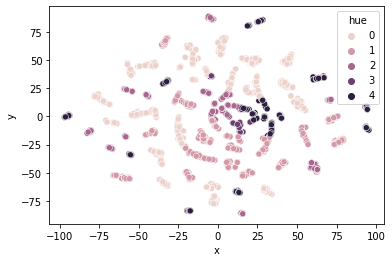

In [135]:
#scotter plot of reduced dimensionality for the movie The Big Short
sns.scatterplot(
    x = "x", y="y",
    hue="hue",
    data=embedding)
plt.savefig('images/tsne_bigshort.jpg')

# Cloudy With a Chance of Meatballs

## LDA

In [136]:
#read in Cloudy with a Chance of Meatballs csv
CloudywithaChanceofMeatballs = pd.read_csv('CloudywithaChanceofMeatballs.csv')
CloudywithaChanceofMeatballs.drop(columns=['Unnamed: 0'], axis = 1, inplace = True)
CloudywithaChanceofMeatballs.head()

,date,tweet,language,hashtags,username,link,retweet,nlikes,nreplies,nretweets,vader_score,positive sentiment score,negative sentiment score,neutral sentiment score,compound sentiment score
0,2010-09-16 19:54:13,Cloudy with a chance of meatballs :),en,[],TyraMyricks,https://twitter.com/TyraMyricks/status/2470891...,False,0,0,0,"{'neg': 0.0, 'neu': 0.5, 'pos': 0.5, 'compound...",0.500,0.0,0.500,0.6124
1,2010-09-16 19:35:21,@redshiftlove cloudy with a chance of meatball...,en,[],t8steve,https://twitter.com/t8steve/status/24707565423,False,0,0,0,"{'neg': 0.0, 'neu': 0.753, 'pos': 0.247, 'comp...",0.247,0.0,0.753,0.3164
2,2010-09-16 17:27:08,I think it is officially time for me to addres...,en,[],JamesTheFourth,https://twitter.com/JamesTheFourth/status/2469...,False,0,0,0,"{'neg': 0.0, 'neu': 0.913, 'pos': 0.087, 'comp...",0.087,0.0,0.913,0.2500
3,2010-09-16 17:18:49,I got Cloudy with a Chance of Meatballs on Blu...,en,[],beandog76,https://twitter.com/beandog76/status/24698154027,False,0,0,0,"{'neg': 0.0, 'neu': 0.625, 'pos': 0.375, 'comp...",0.375,0.0,0.625,0.6588
4,2010-09-16 17:17:17,@Ollievoso like in Cloudy with a Chance of Mea...,en,[],Ferrisislove,https://twitter.com/Ferrisislove/status/246980...,False,0,0,0,"{'neg': 0.0, 'neu': 0.506, 'pos': 0.494, 'comp...",0.494,0.0,0.506,0.8679


In [137]:
#tokenizing each tweet
tokenized_tweets = []
for tweet in CloudywithaChanceofMeatballs['tweet']:
    tokenized_tweets.append(tokenizer.tokenize(tweet.lower())) #making all tweets lowercase so no word is duplicated later on
# tokenized_tweets

In [138]:
#lemmatize tweets
lemmatized_tweets=[]
for tweet in tokenized_tweets:
    lemmatized_words = []
    for word in tweet:
        if word not in stopwords_list:
            lemmatized_words.append(lemmatizer.lemmatize(word))
    lemmatized_tweets.append(lemmatized_words)

# lemmatized_tweets

In [139]:
#adding to Cloudy With a Chance of Meatballs dataframe 

#lemmatized tweets list version
CloudywithaChanceofMeatballs['lemmatize'] = lemmatized_tweets

#string version
lemmatized_tweets_str_lst = []
for tweet in CloudywithaChanceofMeatballs['lemmatize'].tolist():
    lemmatized_tweets_str_lst.append(" ".join(tweet))

CloudywithaChanceofMeatballs['string_lemmatized'] = lemmatized_tweets_str_lst

CloudywithaChanceofMeatballs.head()

,date,tweet,language,hashtags,username,link,retweet,nlikes,nreplies,nretweets,vader_score,positive sentiment score,negative sentiment score,neutral sentiment score,compound sentiment score,lemmatize,string_lemmatized
0,2010-09-16 19:54:13,Cloudy with a chance of meatballs :),en,[],TyraMyricks,https://twitter.com/TyraMyricks/status/2470891...,False,0,0,0,"{'neg': 0.0, 'neu': 0.5, 'pos': 0.5, 'compound...",0.500,0.0,0.500,0.6124,"[cloudy, chance, meatball]",cloudy chance meatball
1,2010-09-16 19:35:21,@redshiftlove cloudy with a chance of meatball...,en,[],t8steve,https://twitter.com/t8steve/status/24707565423,False,0,0,0,"{'neg': 0.0, 'neu': 0.753, 'pos': 0.247, 'comp...",0.247,0.0,0.753,0.3164,"[redshiftlove, cloudy, chance, meatball]",redshiftlove cloudy chance meatball
2,2010-09-16 17:27:08,I think it is officially time for me to addres...,en,[],JamesTheFourth,https://twitter.com/JamesTheFourth/status/2469...,False,0,0,0,"{'neg': 0.0, 'neu': 0.913, 'pos': 0.087, 'comp...",0.087,0.0,0.913,0.2500,"[think, officially, time, address, whole, seen...",think officially time address whole seen cloud...
3,2010-09-16 17:18:49,I got Cloudy with a Chance of Meatballs on Blu...,en,[],beandog76,https://twitter.com/beandog76/status/24698154027,False,0,0,0,"{'neg': 0.0, 'neu': 0.625, 'pos': 0.375, 'comp...",0.375,0.0,0.625,0.6588,"[cloudy, chance, meatball, blu, ray, woo]",cloudy chance meatball blu ray woo
4,2010-09-16 17:17:17,@Ollievoso like in Cloudy with a Chance of Mea...,en,[],Ferrisislove,https://twitter.com/Ferrisislove/status/246980...,False,0,0,0,"{'neg': 0.0, 'neu': 0.506, 'pos': 0.494, 'comp...",0.494,0.0,0.506,0.8679,"[ollievoso, like, cloudy, chance, meatball, wo...",ollievoso like cloudy chance meatball would aw...


In [140]:
# sparse Document Term Matrix
vec = CountVectorizer(stop_words=stopwords_list)
X = vec.fit_transform(CloudywithaChanceofMeatballs['string_lemmatized'].tolist())
df = pd.DataFrame(X.toarray(), columns = vec.get_feature_names())
df.head()

,00,000,00p,00pm,01,02,03,037,039,040,...,zodiaclife,zombieland,zomg,zonarosa,zondara,zone,zooted,zpxdhxzw6g,zrim,zshnli5q
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [141]:
#dictionary of numbers to words
dictionary = corpora.Dictionary(CloudywithaChanceofMeatballs['lemmatize'])

In [142]:
#bag of words
corpus = []
for tweet in CloudywithaChanceofMeatballs['lemmatize']:
    corpus.append(dictionary.doc2bow(tweet))

In [143]:
#run LDA model on Cloudy with a Chance of Meatballs
lda = models.LdaMulticore(corpus=corpus, id2word=dictionary, num_topics=5, passes=10)
for elem in lda.print_topics():
    print("Topic", elem[0], "\nWords:", elem[1])

Topic 0 
Words: 0.088*"meatball" + 0.088*"chance" + 0.088*"cloudy" + 0.029*"movie" + 0.020*"love" + 0.015*"watching" + 0.009*"seen" + 0.009*"watch" + 0.007*"film" + 0.007*"one"
Topic 1 
Words: 0.067*"cloudy" + 0.067*"meatball" + 0.066*"chance" + 0.028*"movie" + 0.016*"park" + 0.016*"tonight" + 0.015*"free" + 0.012*"bit" + 0.011*"night" + 0.009*"time"
Topic 2 
Words: 0.130*"cloudy" + 0.130*"chance" + 0.130*"meatball" + 0.046*"watching" + 0.014*"dvd" + 0.010*"movie" + 0.008*"watch" + 0.007*"p" + 0.006*"e" + 0.005*"inandout"
Topic 3 
Words: 0.090*"cloudy" + 0.089*"meatball" + 0.089*"chance" + 0.019*"movie" + 0.013*"ray" + 0.013*"blu" + 0.012*"watching" + 0.011*"3" + 0.009*"3d" + 0.008*"bit"
Topic 4 
Words: 0.094*"cloudy" + 0.093*"chance" + 0.092*"meatball" + 0.019*"bit" + 0.014*"great" + 0.012*"good" + 0.012*"movie" + 0.011*"disc" + 0.010*"edition" + 0.010*"watchin"


In [145]:
#display LDA model on Cloudy with a Chance of Meatballs
pyLDAvis.enable_notebook()
vis = pyLDAvis.gensim.prepare(lda, corpus, dictionary)
# pyLDAvis.save_html(vis, 'images/lda_cloudywithachanceofmeatballs.html')

## TSNE

In [147]:
#create matrix from LDA model
X = []
for i in range(len(corpus)):
    if len(lda[corpus[i]]) == 5:
        X.append([y for (x,y) in lda[corpus[i]]])
        
# X

In [148]:
#reduce dimensionality
tsne = TSNE(n_components=2, random_state=27)
embedding = tsne.fit_transform(np.array(X))
embedding = pd.DataFrame(embedding, columns=['x','y'])
embedding['hue'] = np.array(X).argmax(axis=1)

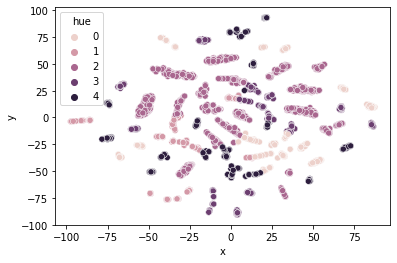

In [149]:
#scatter plot of reduced dimensionality for the movie Cloudy with a Chance of Meatballs
sns.scatterplot(
    x = "x", y="y",
    hue="hue",
    data=embedding)
plt.savefig('images/tsne_cloudywithachanceofmeatballs.jpg')

# Wall-E

## LDA 

In [150]:
#read in Wall-E
WallE = pd.read_csv('Walle.csv')
WallE.drop(columns=['Unnamed: 0'], axis = 1, inplace = True)
WallE.head()

,date,tweet,language,hashtags,username,link,retweet,nlikes,nreplies,nretweets,vader_score,positive sentiment score,negative sentiment score,neutral sentiment score,compound sentiment score
0,2009-06-25 19:37:09,Breaking News: Wall-E's battier has run out. H...,en,[],gawjr,https://twitter.com/gawjr/status/2335057043,False,0,0,0,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.000,0.0,1.000,0.0000
1,2009-06-25 19:27:14,"I think my mind is too complex for WALL-E, @wu...",en,[],itsbrookekelly,https://twitter.com/itsbrookekelly/status/2334...,False,0,0,0,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.000,0.0,1.000,0.0000
2,2009-06-25 19:22:26,Bout to watch Wall-e the best movie ever!!!!,en,[],IdntKnowat2put,https://twitter.com/IdntKnowat2put/status/2334...,False,0,0,0,"{'neg': 0.0, 'neu': 0.566, 'pos': 0.434, 'comp...",0.434,0.0,0.566,0.7482
3,2009-06-25 19:20:48,Finally home full of micky d's n watchn wall-e,en,[],EliThunder85,https://twitter.com/EliThunder85/status/233474...,False,0,0,0,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.000,0.0,1.000,0.0000
4,2009-06-25 19:07:13,@erinichristine word to wall-e!,en,[],_paulstewart,https://twitter.com/_paulstewart/status/233449...,False,0,0,0,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.000,0.0,1.000,0.0000


In [151]:
#tokenizing each tweet
tokenized_tweets = []
for tweet in WallE['tweet']:
    tokenized_tweets.append(tokenizer.tokenize(tweet.lower())) #making all tweets lowercase so no word is duplicated later on
# tokenized_tweets

In [152]:
#lemmatize tweets
lemmatized_tweets=[]
for tweet in tokenized_tweets:
    lemmatized_words = []
    for word in tweet:
        if word not in stopwords_list:
            lemmatized_words.append(lemmatizer.lemmatize(word))
    lemmatized_tweets.append(lemmatized_words)

# lemmatized_tweets

In [153]:
#adding to Wall-E dataframe 

#lemmatized tweets list version
WallE['lemmatize'] = lemmatized_tweets

#string version
lemmatized_tweets_str_lst = []
for tweet in WallE['lemmatize'].tolist():
    lemmatized_tweets_str_lst.append(" ".join(tweet))

WallE['string_lemmatized'] = lemmatized_tweets_str_lst

WallE.head()

,date,tweet,language,hashtags,username,link,retweet,nlikes,nreplies,nretweets,vader_score,positive sentiment score,negative sentiment score,neutral sentiment score,compound sentiment score,lemmatize,string_lemmatized
0,2009-06-25 19:37:09,Breaking News: Wall-E's battier has run out. H...,en,[],gawjr,https://twitter.com/gawjr/status/2335057043,False,0,0,0,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.000,0.0,1.000,0.0000,"[breaking, news, wall, e, battier, run, found,...",breaking news wall e battier run found transpo...
1,2009-06-25 19:27:14,"I think my mind is too complex for WALL-E, @wu...",en,[],itsbrookekelly,https://twitter.com/itsbrookekelly/status/2334...,False,0,0,0,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.000,0.0,1.000,0.0000,"[think, mind, complex, wall, e, wutendeskind]",think mind complex wall e wutendeskind
2,2009-06-25 19:22:26,Bout to watch Wall-e the best movie ever!!!!,en,[],IdntKnowat2put,https://twitter.com/IdntKnowat2put/status/2334...,False,0,0,0,"{'neg': 0.0, 'neu': 0.566, 'pos': 0.434, 'comp...",0.434,0.0,0.566,0.7482,"[bout, watch, wall, e, best, movie, ever]",bout watch wall e best movie ever
3,2009-06-25 19:20:48,Finally home full of micky d's n watchn wall-e,en,[],EliThunder85,https://twitter.com/EliThunder85/status/233474...,False,0,0,0,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.000,0.0,1.000,0.0000,"[finally, home, full, micky, n, watchn, wall, e]",finally home full micky n watchn wall e
4,2009-06-25 19:07:13,@erinichristine word to wall-e!,en,[],_paulstewart,https://twitter.com/_paulstewart/status/233449...,False,0,0,0,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.000,0.0,1.000,0.0000,"[erinichristine, word, wall, e]",erinichristine word wall e


In [154]:
# sparse Document Term Matrix
vec = CountVectorizer(stop_words=stopwords_list)
X = vec.fit_transform(WallE['string_lemmatized'].tolist())
df = pd.DataFrame(X.toarray(), columns = vec.get_feature_names())
df.head()

,00,000,002,00s,01709,0317,04,05,05fj,06,...,zomg,zone,zoo,zu1ol,zulky,zygbot,zzz,zzzz,zzzzzz,zzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzz
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [155]:
#dictionary of numbers to words
dictionary = corpora.Dictionary(WallE['lemmatize'])

In [156]:
#bag of words
corpus = []
for tweet in WallE['lemmatize']:
    corpus.append(dictionary.doc2bow(tweet))

In [157]:
#running LDA Wall-E model
lda = models.LdaMulticore(corpus=corpus, id2word=dictionary, num_topics=5, passes=10)
for elem in lda.print_topics():
    print("Topic", elem[0], "\nWords:", elem[1])

Topic 0 
Words: 0.083*"e" + 0.083*"wall" + 0.012*"watched" + 0.009*"movie" + 0.007*"night" + 0.007*"like" + 0.007*"last" + 0.007*"bit" + 0.006*"3" + 0.006*"saw"
Topic 1 
Words: 0.075*"wall" + 0.074*"e" + 0.013*"first" + 0.012*"time" + 0.011*"movie" + 0.008*"watch" + 0.008*"watching" + 0.007*"watched" + 0.007*"like" + 0.006*"pixar"
Topic 2 
Words: 0.115*"e" + 0.114*"wall" + 0.034*"watching" + 0.023*"movie" + 0.009*"watch" + 0.008*"time" + 0.008*"love" + 0.007*"like" + 0.007*"cute" + 0.007*"tinyurl"
Topic 3 
Words: 0.091*"e" + 0.090*"wall" + 0.014*"watching" + 0.011*"love" + 0.010*"bit" + 0.009*"good" + 0.009*"movie" + 0.009*"better" + 0.007*"watch" + 0.006*"make"
Topic 4 
Words: 0.072*"e" + 0.072*"wall" + 0.011*"good" + 0.010*"nemo" + 0.010*"watching" + 0.009*"gt" + 0.009*"movie" + 0.007*"pixar" + 0.007*"finding" + 0.007*"story"


In [159]:
#display LDA Wall-E model
pyLDAvis.enable_notebook()
vis = pyLDAvis.gensim.prepare(lda, corpus, dictionary)
vis
# pyLDAvis.save_html(vis, 'images/lda_walle.html')

PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
2      0.029290  0.046599       1        1  34.722164
3      0.028044  0.073960       2        1  21.776490
0      0.039947 -0.040517       3        1  16.596586
4     -0.129875 -0.004853       4        1  13.609577
1      0.032594 -0.075189       5        1  13.295183, topic_info=        Term         Freq        Total Category  logprob  loglift
270    first   139.000000   139.000000  Default  30.0000  30.0000
38      nemo    82.000000    82.000000  Default  29.0000  29.0000
226       gt    77.000000    77.000000  Default  28.0000  28.0000
317  watched   240.000000   240.000000  Default  27.0000  27.0000
3          e  4797.000000  4797.000000  Default  26.0000  26.0000
..       ...          ...          ...      ...      ...      ...
212      one    24.999807   160.710043   Topic5  -5.6122   0.1570
4        eve    19.006510    92.620581   Topic5  -5.8863   0.4340
660    robot    20.286560   170.344943   Topic5  -5.8211  -0.1101
209     cute    18.197474   225.303875   Topic5  -5.9298  -0.4984
805  tonight    15.378676    68.693659   Topic5  -6.0981   0.5211

[393 rows x 6 columns], token_table=      Topic      Freq     Term
term                          
5195      2  0.782145       00
1022      2  0.075070      000
1022      3  0.225211      000
1022      5  0.675633      000
588       1  0.318937        1
...     ...       ...      ...
4680      3  0.945536    wqh5g
4470      2  0.150247       ya
4470      5  0.751233       ya
5982      4  0.716139     yall
1967      2  0.838405  youtube

[797 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[3, 4, 1, 5, 2])

## TSNE 

In [161]:
#create matrix from LDA model
X = []
for i in range(len(corpus)):
    if len(lda[corpus[i]]) == 5:
        X.append([y for (x,y) in lda[corpus[i]]])
        
# X

In [162]:
#reduce dimensionality
tsne = TSNE(n_components=2, random_state=27)
embedding = tsne.fit_transform(np.array(X))
embedding = pd.DataFrame(embedding, columns=['x','y'])
embedding['hue'] = np.array(X).argmax(axis=1)

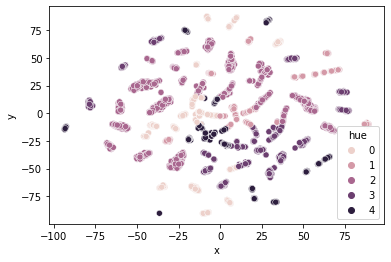

In [163]:
#Wall-E reduced dimensionality T-SNE scatter plot
sns.scatterplot(
    x = "x", y="y",
    hue="hue",
    data=embedding)
plt.savefig('images/tsne_walle.jpg')

# Slumdog Millionaire

## LDA 

In [164]:
#read in Slumdog Millionaire csv
SlumdogMillionaire = pd.read_csv('SlumdogMillionaire.csv')
SlumdogMillionaire.drop(columns=['Unnamed: 0'], axis = 1, inplace = True)
SlumdogMillionaire.head()

,date,tweet,language,hashtags,username,link,retweet,nlikes,nreplies,nretweets,vader_score,positive sentiment score,negative sentiment score,neutral sentiment score,compound sentiment score
0,2009-11-10 18:29:55,@krael52 because shravani and keethi want to p...,en,[],GregoryRael,https://twitter.com/GregoryRael/status/5603007478,False,0,0,0,"{'neg': 0.0, 'neu': 0.834, 'pos': 0.166, 'comp...",0.166,0.0,0.834,0.4574
1,2009-11-10 17:56:36,Outside with sam jefferson and my big sis... c...,en,[],Desha_c16,https://twitter.com/Desha_c16/status/5602137272,False,0,0,0,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.000,0.0,1.000,0.0000
2,2009-11-10 17:29:05,@1heavenlyflower: OMG! my favorite movie.........,en,[],TrinaChavez,https://twitter.com/TrinaChavez/status/5601420853,False,0,0,0,"{'neg': 0.0, 'neu': 0.59, 'pos': 0.41, 'compou...",0.410,0.0,0.590,0.6331
3,2009-11-10 17:20:07,"Crapola News!, Slumdog Millionaire grabs 5 nod...",en,[],DailyNewsBuzz,https://twitter.com/DailyNewsBuzz/status/56011...,False,0,0,0,"{'neg': 0.0, 'neu': 0.785, 'pos': 0.215, 'comp...",0.215,0.0,0.785,0.5093
4,2009-11-10 17:13:39,Standing in line with @lparaggio to get her vi...,en,[],isaiahheaden,https://twitter.com/isaiahheaden/status/560102...,False,0,0,0,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.000,0.0,1.000,0.0000


In [165]:
#tokenizing each tweet
tokenized_tweets = []
for tweet in SlumdogMillionaire['tweet']:
    tokenized_tweets.append(tokenizer.tokenize(tweet.lower())) #making all tweets lowercase so no word is duplicated later on
# tokenized_tweets

In [166]:
#lemmatize tweets
lemmatized_tweets=[]
for tweet in tokenized_tweets:
    lemmatized_words = []
    for word in tweet:
        if word not in stopwords_list:
            lemmatized_words.append(lemmatizer.lemmatize(word))
    lemmatized_tweets.append(lemmatized_words)

# lemmatized_tweets

In [167]:
#adding to Slumdog Millionaire dataframe 

#lemmatized tweets list version
SlumdogMillionaire['lemmatize'] = lemmatized_tweets

#string version
lemmatized_tweets_str_lst = []
for tweet in SlumdogMillionaire['lemmatize'].tolist():
    lemmatized_tweets_str_lst.append(" ".join(tweet))

SlumdogMillionaire['string_lemmatized'] = lemmatized_tweets_str_lst

SlumdogMillionaire.head()

,date,tweet,language,hashtags,username,link,retweet,nlikes,nreplies,nretweets,vader_score,positive sentiment score,negative sentiment score,neutral sentiment score,compound sentiment score,lemmatize,string_lemmatized
0,2009-11-10 18:29:55,@krael52 because shravani and keethi want to p...,en,[],GregoryRael,https://twitter.com/GregoryRael/status/5603007478,False,0,0,0,"{'neg': 0.0, 'neu': 0.834, 'pos': 0.166, 'comp...",0.166,0.0,0.834,0.4574,"[krael52, shravani, keethi, want, play, wanty,...",krael52 shravani keethi want play wanty beat b...
1,2009-11-10 17:56:36,Outside with sam jefferson and my big sis... c...,en,[],Desha_c16,https://twitter.com/Desha_c16/status/5602137272,False,0,0,0,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.000,0.0,1.000,0.0000,"[outside, sam, jefferson, big, si, chillin, po...",outside sam jefferson big si chillin porch bou...
2,2009-11-10 17:29:05,@1heavenlyflower: OMG! my favorite movie.........,en,[],TrinaChavez,https://twitter.com/TrinaChavez/status/5601420853,False,0,0,0,"{'neg': 0.0, 'neu': 0.59, 'pos': 0.41, 'compou...",0.410,0.0,0.590,0.6331,"[1heavenlyflower, omg, favorite, movie, slumdo...",1heavenlyflower omg favorite movie slumdog mil...
3,2009-11-10 17:20:07,"Crapola News!, Slumdog Millionaire grabs 5 nod...",en,[],DailyNewsBuzz,https://twitter.com/DailyNewsBuzz/status/56011...,False,0,0,0,"{'neg': 0.0, 'neu': 0.785, 'pos': 0.215, 'comp...",0.215,0.0,0.785,0.5093,"[crapola, news, slumdog, millionaire, grab, 5,...",crapola news slumdog millionaire grab 5 nod eu...
4,2009-11-10 17:13:39,Standing in line with @lparaggio to get her vi...,en,[],isaiahheaden,https://twitter.com/isaiahheaden/status/560102...,False,0,0,0,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.000,0.0,1.000,0.0000,"[standing, line, lparaggio, visa, slumdog, mil...",standing line lparaggio visa slumdog millionai...


In [168]:
# sparse Document Term Matrix
vec = CountVectorizer(stop_words=stopwords_list)
X = vec.fit_transform(SlumdogMillionaire['string_lemmatized'].tolist())
df = pd.DataFrame(X.toarray(), columns = vec.get_feature_names())
df.head()

,00,01,039,04am,05,057allowances,06,07,08,085,...,zoo,zu4ak,zuko,zukoso,zumg,zvydy,zxsfj,zzzs,zzzz,zzzzzzzzzz
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [169]:
##dictionary of numbers to words
dictionary = corpora.Dictionary(SlumdogMillionaire['lemmatize'])

In [170]:
#bag of words (tokenid, tokencount)
corpus = []
for tweet in SlumdogMillionaire['lemmatize']:
    corpus.append(dictionary.doc2bow(tweet))

In [171]:
#running LDA model on Slumdog Millionaire
lda = models.LdaMulticore(corpus=corpus, id2word=dictionary, num_topics=5, passes=10)
for elem in lda.print_topics():
    print("Topic", elem[0], "\nWords:", elem[1])

Topic 0 
Words: 0.076*"slumdog" + 0.075*"millionaire" + 0.045*"bit" + 0.029*"school" + 0.025*"new" + 0.022*"lie" + 0.022*"marketing" + 0.022*"kim" + 0.022*"klaver" + 0.018*"kid"
Topic 1 
Words: 0.108*"slumdog" + 0.107*"millionaire" + 0.058*"watching" + 0.018*"time" + 0.017*"movie" + 0.010*"first" + 0.008*"lol" + 0.007*"film" + 0.007*"great" + 0.007*"finally"
Topic 2 
Words: 0.057*"slumdog" + 0.055*"millionaire" + 0.027*"bit" + 0.018*"pinto" + 0.016*"freida" + 0.013*"boyle" + 0.011*"39" + 0.011*"film" + 0.011*"dev" + 0.010*"patel"
Topic 3 
Words: 0.085*"slumdog" + 0.077*"millionaire" + 0.017*"bit" + 0.017*"movie" + 0.016*"star" + 0.015*"kid" + 0.012*"child" + 0.011*"trust" + 0.010*"fund" + 0.008*"lol"
Topic 4 
Words: 0.106*"millionaire" + 0.106*"slumdog" + 0.047*"movie" + 0.026*"good" + 0.021*"watching" + 0.015*"watch" + 0.014*"watched" + 0.010*"love" + 0.010*"watchin" + 0.009*"great"


In [173]:
#display Slumdog Millionaire LDA model
pyLDAvis.enable_notebook()
vis = pyLDAvis.gensim.prepare(lda, corpus, dictionary)
vis
# pyLDAvis.save_html(vis, 'images/lda_slumdogmillionaire.html')

PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
4     -0.105386 -0.068617       1        1  34.645820
1     -0.097669 -0.016096       2        1  20.463227
3     -0.022954  0.012267       3        1  19.428073
0      0.177813 -0.092684       4        1  14.787974
2      0.048196  0.165130       5        1  10.674906, topic_info=             Term        Freq        Total Category  logprob  loglift
48       watching  982.000000   982.000000  Default  30.0000  30.0000
61            bit  764.000000   764.000000  Default  29.0000  29.0000
1630       school  266.000000   266.000000  Default  28.0000  28.0000
133          good  473.000000   473.000000  Default  27.0000  27.0000
575           new  233.000000   233.000000  Default  26.0000  26.0000
...           ...         ...          ...      ...      ...      ...
249   mountaineer   13.161812    27.683240   Topic5  -6.0027   1.4938
24          movie   24.678849  1200.506731   Topic5  -5.3741  -1.6473
171          love   17.781731   266.134812   Topic5  -5.7018  -0.4686
36        tinyurl   14.600092    62.307945   Topic5  -5.8990   0.7862
27          award   14.472732    72.922371   Topic5  -5.9077   0.6201

[325 rows x 6 columns], token_table=      Topic      Freq      Term
term                           
369       2  0.905820       127
369       4  0.041174       127
811       4  0.966334    153oak
676       1  0.947687    19z1vn
4400      1  0.115439    1givy6
...     ...       ...       ...
101       2  0.170088      year
101       3  0.585860      year
101       4  0.018899      year
101       5  0.075595      year
2167      3  0.866804  youngest

[629 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[5, 2, 4, 1, 3])

## TSNE 

In [174]:
#create matrix from LDA model
X = []
for i in range(len(corpus)):
    if len(lda[corpus[i]]) == 5:
        X.append([y for (x,y) in lda[corpus[i]]])
        
# X

In [175]:
#reduce dimensionality
tsne = TSNE(n_components=2, random_state=27)
embedding = tsne.fit_transform(np.array(X))
embedding = pd.DataFrame(embedding, columns=['x','y'])
embedding['hue'] = np.array(X).argmax(axis=1)

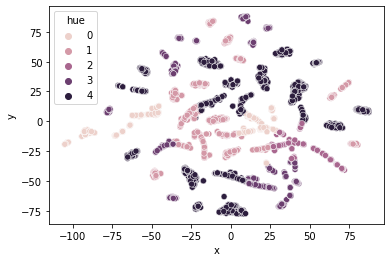

In [176]:
#plot tsne
sns.scatterplot(
    x = "x", y="y",
    hue="hue",
    data=embedding)
plt.savefig('images/tsne_slumdogmillionaire.jpg')

# Bird Box

## LDA 

In [177]:
#read in Bird Box csv
BirdBox = pd.read_csv('BirdBox.csv')
BirdBox.drop(columns=['Unnamed: 0'], axis = 1, inplace = True)
BirdBox.head()

,date,tweet,language,hashtags,username,link,retweet,nlikes,nreplies,nretweets,vader_score,positive sentiment score,negative sentiment score,neutral sentiment score,compound sentiment score
0,2019-12-12 18:55:11,Lil Natty &amp; Thunda ft. Travis World &amp; ...,en,"['caribbeansessions', 'pressplay']",CaribSessions,https://twitter.com/CaribSessions/status/12052...,False,0,0,0,"{'neg': 0.0, 'neu': 0.938, 'pos': 0.062, 'comp...",0.062,0.000,0.938,0.2023
1,2019-12-12 18:48:41,I also stopped and ended up buying the Angry B...,en,[],nerdboner,https://twitter.com/nerdboner/status/120527329...,False,1,0,0,"{'neg': 0.242, 'neu': 0.522, 'pos': 0.236, 'co...",0.236,0.242,0.522,-0.0587
2,2019-12-12 18:37:12,I know I'm doing really well but part of me ju...,en,[],Antalya_Bird,https://twitter.com/Antalya_Bird/status/120527...,False,1,0,0,"{'neg': 0.0, 'neu': 0.922, 'pos': 0.078, 'comp...",0.078,0.000,0.922,0.1770
3,2019-12-12 18:35:24,K News - Olympia underground record label Fair...,en,[],K_recs,https://twitter.com/K_recs/status/120526995400...,False,1,0,1,"{'neg': 0.0, 'neu': 0.918, 'pos': 0.082, 'comp...",0.082,0.000,0.918,0.3802
4,2019-12-12 18:34:14,@RuthsBestBoy I'd like to commission an all-ye...,en,[],DanaGavin1895,https://twitter.com/DanaGavin1895/status/12052...,False,0,0,0,"{'neg': 0.0, 'neu': 0.767, 'pos': 0.233, 'comp...",0.233,0.000,0.767,0.9313


In [178]:
#tokenizing each tweet
tokenized_tweets = []
for tweet in BirdBox['tweet']:
    tokenized_tweets.append(tokenizer.tokenize(tweet.lower())) #making all tweets lowercase so no word is duplicated later on
# tokenized_tweets

In [179]:
#lemmatize tweets
lemmatized_tweets=[]
for tweet in tokenized_tweets:
    lemmatized_words = []
    for word in tweet:
        if word not in stopwords_list:
            lemmatized_words.append(lemmatizer.lemmatize(word))
    lemmatized_tweets.append(lemmatized_words)

# lemmatized_tweets

In [180]:
#adding to Bird Box dataframe 

#lemmatized tweets list version
BirdBox['lemmatize'] = lemmatized_tweets

#string version
lemmatized_tweets_str_lst = []
for tweet in BirdBox['lemmatize'].tolist():
    lemmatized_tweets_str_lst.append(" ".join(tweet))

BirdBox['string_lemmatized'] = lemmatized_tweets_str_lst

BirdBox.head()

,date,tweet,language,hashtags,username,link,retweet,nlikes,nreplies,nretweets,vader_score,positive sentiment score,negative sentiment score,neutral sentiment score,compound sentiment score,lemmatize,string_lemmatized
0,2019-12-12 18:55:11,Lil Natty &amp; Thunda ft. Travis World &amp; ...,en,"['caribbeansessions', 'pressplay']",CaribSessions,https://twitter.com/CaribSessions/status/12052...,False,0,0,0,"{'neg': 0.0, 'neu': 0.938, 'pos': 0.062, 'comp...",0.062,0.000,0.938,0.2023,"[lil, natty, thunda, ft, travis, world, julius...",lil natty thunda ft travis world julius czar g...
1,2019-12-12 18:48:41,I also stopped and ended up buying the Angry B...,en,[],nerdboner,https://twitter.com/nerdboner/status/120527329...,False,1,0,0,"{'neg': 0.242, 'neu': 0.522, 'pos': 0.236, 'co...",0.236,0.242,0.522,-0.0587,"[also, stopped, ended, buying, angry, bird, st...",also stopped ended buying angry bird star war ...
2,2019-12-12 18:37:12,I know I'm doing really well but part of me ju...,en,[],Antalya_Bird,https://twitter.com/Antalya_Bird/status/120527...,False,1,0,0,"{'neg': 0.0, 'neu': 0.922, 'pos': 0.078, 'comp...",0.078,0.000,0.922,0.1770,"[know, really, well, part, really, want, eat, ...",know really well part really want eat whole bo...
3,2019-12-12 18:35:24,K News - Olympia underground record label Fair...,en,[],K_recs,https://twitter.com/K_recs/status/120526995400...,False,1,0,1,"{'neg': 0.0, 'neu': 0.918, 'pos': 0.082, 'comp...",0.082,0.000,0.918,0.3802,"[k, news, olympia, underground, record, label,...",k news olympia underground record label fair b...
4,2019-12-12 18:34:14,@RuthsBestBoy I'd like to commission an all-ye...,en,[],DanaGavin1895,https://twitter.com/DanaGavin1895/status/12052...,False,0,0,0,"{'neg': 0.0, 'neu': 0.767, 'pos': 0.233, 'comp...",0.233,0.000,0.767,0.9313,"[ruthsbestboy, like, commission, year, round, ...",ruthsbestboy like commission year round box sa...


In [181]:
# sparse Document Term Matrix
vec = CountVectorizer(stop_words=stopwords_list)
X = vec.fit_transform(BirdBox['string_lemmatized'].tolist())
df = pd.DataFrame(X.toarray(), columns = vec.get_feature_names())
df.head()

,00,000,00012,009,00pm,00usdvrf2u,01,01293,01298,01664,...,zwsoh1p0ce,zwu5qdtzbv,zxqpyu0d8g,zxsrswu7qq,zygoluiruc,zyp551lsw9,zzibaim,zzn31fssl2,zzrfvlibi2,zztrlcq1nz
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [182]:
#dictionary of numbers to words
dictionary = corpora.Dictionary(BirdBox['lemmatize'])

In [183]:
#bag of words
corpus = []
for tweet in BirdBox['lemmatize']:
    corpus.append(dictionary.doc2bow(tweet))

In [184]:
#running Bird Box LDA model 
lda = models.LdaMulticore(corpus=corpus, id2word=dictionary, num_topics=5, passes=10)
for elem in lda.print_topics():
    print("Topic", elem[0], "\nWords:", elem[1])

Topic 0 
Words: 0.074*"box" + 0.072*"bird" + 0.006*"birdbox" + 0.005*"via" + 0.004*"see" + 0.004*"like" + 0.004*"vintage" + 0.004*"star" + 0.003*"one" + 0.003*"gift"
Topic 1 
Words: 0.072*"news" + 0.040*"today" + 0.039*"usa" + 0.022*"box" + 0.021*"netflix" + 0.021*"bird" + 0.021*"amazon" + 0.021*"google" + 0.021*"credit" + 0.021*"health"
Topic 2 
Words: 0.054*"bird" + 0.052*"box" + 0.019*"birdbox" + 0.013*"like" + 0.010*"movie" + 0.008*"moviemenfess" + 0.006*"2" + 0.006*"watching" + 0.005*"bad" + 0.005*"netflix"
Topic 3 
Words: 0.042*"box" + 0.042*"bird" + 0.021*"birdbox" + 0.007*"year" + 0.007*"soca" + 0.006*"2019" + 0.005*"7" + 0.005*"world" + 0.005*"playing" + 0.004*"julius"
Topic 4 
Words: 0.021*"box" + 0.020*"bird" + 0.014*"watch" + 0.013*"gt" + 0.012*"birdbox" + 0.008*"bobo" + 0.008*"wooden" + 0.007*"gift" + 0.006*"ticket" + 0.006*"wood"


In [186]:
#displaying Bird Box LDA modelb
pyLDAvis.enable_notebook()
vis = pyLDAvis.gensim.prepare(lda, corpus, dictionary)
vis
# pyLDAvis.save_html(vis, 'images/lda_birdbox.html')

PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
0     -0.069416  0.028955       1        1  29.247259
2     -0.082703  0.052412       2        1  25.495995
1      0.263838  0.017976       3        1  19.431414
3     -0.075022  0.053324       4        1  16.980074
4     -0.036697 -0.152667       5        1   8.845258, topic_info=        Term         Freq        Total Category  logprob  loglift
60      news  1081.000000  1081.000000  Default  30.0000  30.0000
1168     usa   580.000000   580.000000  Default  29.0000  29.0000
152    today   609.000000   609.000000  Default  28.0000  28.0000
1078  google   313.000000   313.000000  Default  27.0000  27.0000
1151  amazon   318.000000   318.000000  Default  26.0000  26.0000
...      ...          ...          ...      ...      ...      ...
78      like    27.609099   417.516278   Topic5  -5.4850  -0.2909
210      one    18.328234   189.503846   Topic5  -5.8947   0.0893
1061     top    13.867520    57.279208   Topic5  -6.1736   1.0069
1024       u    14.253611    99.310558   Topic5  -6.1461   0.4840
1084   thing    13.850499    98.260029   Topic5  -6.1748   0.4660

[323 rows x 6 columns], token_table=       Topic      Freq  Term
term                        
10091      5  0.906688   020
491        1  0.074026     1
491        2  0.564445     1
491        3  0.009253     1
491        4  0.166558     1
...      ...       ...   ...
89         1  0.200557  year
89         2  0.263890  year
89         3  0.036945  year
89         4  0.490836  year
89         5  0.015833  year

[648 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[1, 3, 2, 4, 5])

## TSNE 

In [188]:
#create matrix from LDA model
X = []
for i in range(len(corpus)):
    if len(lda[corpus[i]]) == 5:
        X.append([y for (x,y) in lda[corpus[i]]])
        
# X

In [189]:
#reduce dimensionality
tsne = TSNE(n_components=2, random_state=27)
embedding = tsne.fit_transform(np.array(X))
embedding = pd.DataFrame(embedding, columns=['x','y'])
embedding['hue'] = np.array(X).argmax(axis=1)

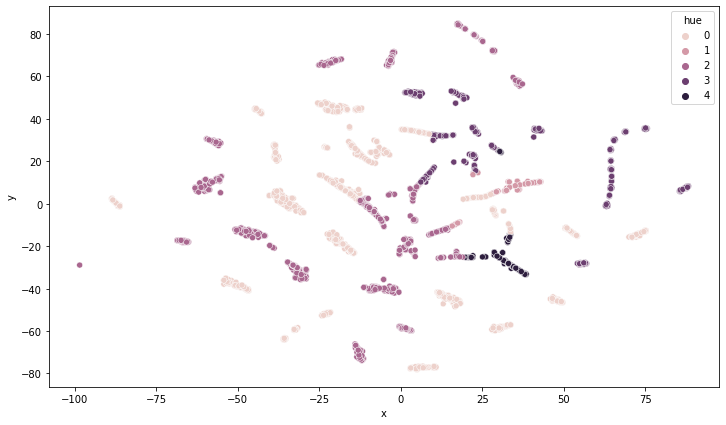

In [193]:
#t-sne plot
fig, ax = plt.subplots(figsize=(12, 7))
sns.scatterplot(
    x = "x", y="y",
    hue="hue",
    ax=ax,
    data=embedding)
# plt.savefig('images/tsne_birdbox.jpg')

# Silver Linings Playbook

## LDA 

In [209]:
#read in Silver Linings Playbook csv
SilverLiningsPlaybook = pd.read_csv('SilverLiningsPlaybook.csv')
SilverLiningsPlaybook.drop(columns=['Unnamed: 0'], axis = 1, inplace = True)
SilverLiningsPlaybook.head()

,date,tweet,language,hashtags,username,link,retweet,nlikes,nreplies,nretweets,vader_score,positive sentiment score,negative sentiment score,neutral sentiment score,compound sentiment score
0,2019-12-12 18:55:11,Lil Natty &amp; Thunda ft. Travis World &amp; ...,en,"['caribbeansessions', 'pressplay']",CaribSessions,https://twitter.com/CaribSessions/status/12052...,False,0,0,0,"{'neg': 0.0, 'neu': 0.938, 'pos': 0.062, 'comp...",0.062,0.000,0.938,0.2023
1,2019-12-12 18:48:41,I also stopped and ended up buying the Angry B...,en,[],nerdboner,https://twitter.com/nerdboner/status/120527329...,False,1,0,0,"{'neg': 0.242, 'neu': 0.522, 'pos': 0.236, 'co...",0.236,0.242,0.522,-0.0587
2,2019-12-12 18:37:12,I know I'm doing really well but part of me ju...,en,[],Antalya_Bird,https://twitter.com/Antalya_Bird/status/120527...,False,1,0,0,"{'neg': 0.0, 'neu': 0.922, 'pos': 0.078, 'comp...",0.078,0.000,0.922,0.1770
3,2019-12-12 18:35:24,K News - Olympia underground record label Fair...,en,[],K_recs,https://twitter.com/K_recs/status/120526995400...,False,1,0,1,"{'neg': 0.0, 'neu': 0.918, 'pos': 0.082, 'comp...",0.082,0.000,0.918,0.3802
4,2019-12-12 18:34:14,@RuthsBestBoy I'd like to commission an all-ye...,en,[],DanaGavin1895,https://twitter.com/DanaGavin1895/status/12052...,False,0,0,0,"{'neg': 0.0, 'neu': 0.767, 'pos': 0.233, 'comp...",0.233,0.000,0.767,0.9313


In [210]:
#tokenizing each tweet
tokenized_tweets = []
for tweet in SilverLiningsPlaybook['tweet']:
    tokenized_tweets.append(tokenizer.tokenize(tweet.lower())) #making all tweets lowercase so no word is duplicated later on
# tokenized_tweets

In [211]:
#lemmatize tweets
lemmatized_tweets=[]
for tweet in tokenized_tweets:
    lemmatized_words = []
    for word in tweet:
        if word not in stopwords_list:
            lemmatized_words.append(lemmatizer.lemmatize(word))
    lemmatized_tweets.append(lemmatized_words)

# lemmatized_tweets

In [212]:
#adding to Silver Linings Playbook dataframe 

#lemmatized tweets list version
SilverLiningsPlaybook['lemmatize'] = lemmatized_tweets

#string version
lemmatized_tweets_str_lst = []
for tweet in SilverLiningsPlaybook['lemmatize'].tolist():
    lemmatized_tweets_str_lst.append(" ".join(tweet))

SilverLiningsPlaybook['string_lemmatized'] = lemmatized_tweets_str_lst

SilverLiningsPlaybook.head()

,date,tweet,language,hashtags,username,link,retweet,nlikes,nreplies,nretweets,vader_score,positive sentiment score,negative sentiment score,neutral sentiment score,compound sentiment score,lemmatize,string_lemmatized
0,2019-12-12 18:55:11,Lil Natty &amp; Thunda ft. Travis World &amp; ...,en,"['caribbeansessions', 'pressplay']",CaribSessions,https://twitter.com/CaribSessions/status/12052...,False,0,0,0,"{'neg': 0.0, 'neu': 0.938, 'pos': 0.062, 'comp...",0.062,0.000,0.938,0.2023,"[lil, natty, thunda, ft, travis, world, julius...",lil natty thunda ft travis world julius czar g...
1,2019-12-12 18:48:41,I also stopped and ended up buying the Angry B...,en,[],nerdboner,https://twitter.com/nerdboner/status/120527329...,False,1,0,0,"{'neg': 0.242, 'neu': 0.522, 'pos': 0.236, 'co...",0.236,0.242,0.522,-0.0587,"[also, stopped, ended, buying, angry, bird, st...",also stopped ended buying angry bird star war ...
2,2019-12-12 18:37:12,I know I'm doing really well but part of me ju...,en,[],Antalya_Bird,https://twitter.com/Antalya_Bird/status/120527...,False,1,0,0,"{'neg': 0.0, 'neu': 0.922, 'pos': 0.078, 'comp...",0.078,0.000,0.922,0.1770,"[know, really, well, part, really, want, eat, ...",know really well part really want eat whole bo...
3,2019-12-12 18:35:24,K News - Olympia underground record label Fair...,en,[],K_recs,https://twitter.com/K_recs/status/120526995400...,False,1,0,1,"{'neg': 0.0, 'neu': 0.918, 'pos': 0.082, 'comp...",0.082,0.000,0.918,0.3802,"[k, news, olympia, underground, record, label,...",k news olympia underground record label fair b...
4,2019-12-12 18:34:14,@RuthsBestBoy I'd like to commission an all-ye...,en,[],DanaGavin1895,https://twitter.com/DanaGavin1895/status/12052...,False,0,0,0,"{'neg': 0.0, 'neu': 0.767, 'pos': 0.233, 'comp...",0.233,0.000,0.767,0.9313,"[ruthsbestboy, like, commission, year, round, ...",ruthsbestboy like commission year round box sa...


In [213]:
# sparse Document Term Matrix
vec = CountVectorizer(stop_words=stopwords_list)
X = vec.fit_transform(SilverLiningsPlaybook['string_lemmatized'].tolist())
df = pd.DataFrame(X.toarray(), columns = vec.get_feature_names())
df.head()

,00,000,00012,009,00pm,00usdvrf2u,01,01293,01298,01664,...,zwsoh1p0ce,zwu5qdtzbv,zxqpyu0d8g,zxsrswu7qq,zygoluiruc,zyp551lsw9,zzibaim,zzn31fssl2,zzrfvlibi2,zztrlcq1nz
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [214]:
#dictionary of numbers to words
dictionary = corpora.Dictionary(SilverLiningsPlaybook['lemmatize'])

In [215]:
#bag of words
corpus = []
for tweet in SilverLiningsPlaybook['lemmatize']:
    corpus.append(dictionary.doc2bow(tweet))

In [216]:
#run LDA model on Silver Linings Playbook
lda = models.LdaMulticore(corpus=corpus, id2word=dictionary, num_topics=5, passes=10)
for elem in lda.print_topics():
    print("Topic", elem[0], "\nWords:", elem[1])

Topic 0 
Words: 0.054*"box" + 0.053*"bird" + 0.012*"birdbox" + 0.012*"watch" + 0.007*"gift" + 0.007*"movie" + 0.005*"wooden" + 0.005*"like" + 0.005*"bobo" + 0.005*"year"
Topic 1 
Words: 0.058*"box" + 0.056*"bird" + 0.013*"birdbox" + 0.011*"moviemenfess" + 0.008*"like" + 0.006*"bad" + 0.006*"train" + 0.005*"busan" + 0.005*"aquaman" + 0.004*"dilan"
Topic 2 
Words: 0.071*"news" + 0.039*"today" + 0.038*"usa" + 0.023*"box" + 0.023*"bird" + 0.021*"netflix" + 0.021*"amazon" + 0.020*"google" + 0.020*"health" + 0.020*"credit"
Topic 3 
Words: 0.037*"box" + 0.035*"bird" + 0.013*"birdbox" + 0.010*"gt" + 0.008*"like" + 0.007*"early" + 0.006*"ticket" + 0.004*"office" + 0.003*"see" + 0.003*"flying"
Topic 4 
Words: 0.062*"bird" + 0.060*"box" + 0.020*"birdbox" + 0.006*"like" + 0.006*"movie" + 0.005*"netflix" + 0.004*"soca" + 0.004*"year" + 0.004*"2019" + 0.004*"2"


In [217]:
#Display LDA model on Silver Linings Playbook
pyLDAvis.enable_notebook()
vis = pyLDAvis.gensim.prepare(lda, corpus, dictionary)
vis
# pyLDAvis.save_html(vis, 'images/lda_silverliningsplaybook.html')

## TSNE

In [218]:
#create matrix from LDA model
X = []
for i in range(len(corpus)):
    if len(lda[corpus[i]]) == 5:
        X.append([y for (x,y) in lda[corpus[i]]])
        
# X

In [219]:
#reduce dimensionality
tsne = TSNE(n_components=2, random_state=27)
embedding = tsne.fit_transform(np.array(X))
embedding = pd.DataFrame(embedding, columns=['x','y'])
embedding['hue'] = np.array(X).argmax(axis=1)

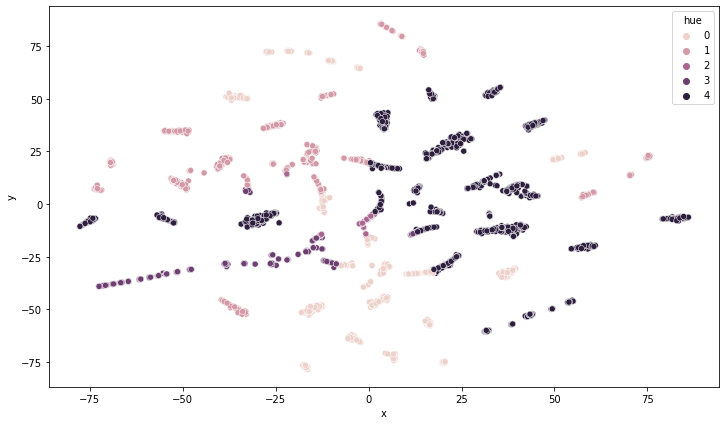

In [220]:
#scatter plot of reduced dimensionality for the movie Silver Lining's Playbook
fig, ax = plt.subplots(figsize = (12,7))
sns.scatterplot(
    x = "x", y="y",
    hue="hue",
    ax = ax,
    data=embedding)
plt.savefig('images/tsne_silverliningsplaybook.jpg')

# Django Unchained

## LDA 

In [221]:
#read in Django Unchained csv
DjangoUnchained = pd.read_csv('DjangoUnchained.csv')
DjangoUnchained.drop(columns=['Unnamed: 0'], axis = 1, inplace = True)
DjangoUnchained.head()

,date,tweet,language,hashtags,username,link,retweet,nlikes,nreplies,nretweets,vader_score,positive sentiment score,negative sentiment score,neutral sentiment score,compound sentiment score
0,2013-12-23 18:44:22,Django Unchained is brilliant #topfilm,en,['topfilm'],Jacobbck_,https://twitter.com/Jacobbck_/status/415266664...,False,2,0,0,"{'neg': 0.0, 'neu': 0.513, 'pos': 0.487, 'comp...",0.487,0.000,0.513,0.5859
1,2013-12-23 18:31:11,Every 10 seconds in Django Unchained you hear ...,en,[],Umaarrr_,https://twitter.com/Umaarrr_/status/4152633444...,False,0,0,0,"{'neg': 0.301, 'neu': 0.699, 'pos': 0.0, 'comp...",0.000,0.301,0.699,-0.6486
2,2013-12-23 18:26:03,Cause I will be a problem. I’m talking Django ...,en,[],DeShayFromVA,https://twitter.com/DeShayFromVA/status/415262...,False,0,0,0,"{'neg': 0.231, 'neu': 0.769, 'pos': 0.0, 'comp...",0.000,0.231,0.769,-0.4019
3,2013-12-23 18:16:54,White house down... Man of steel... Monsters U...,en,[],Mystic_Sk,https://twitter.com/Mystic_Sk/status/415259749...,False,0,2,0,"{'neg': 0.177, 'neu': 0.823, 'pos': 0.0, 'comp...",0.000,0.177,0.823,-0.4767
4,2013-12-23 18:15:53,on a movie scale of 'm night shamalyans the vi...,en,[],dboyyfresh,https://twitter.com/dboyyfresh/status/41525949...,False,1,0,0,"{'neg': 0.167, 'neu': 0.833, 'pos': 0.0, 'comp...",0.000,0.167,0.833,-0.6124


In [222]:
#tokenizing each tweet
tokenized_tweets = []
for tweet in DjangoUnchained['tweet']:
    tokenized_tweets.append(tokenizer.tokenize(tweet.lower())) #making all tweets lowercase so no word is duplicated later on
# tokenized_tweets

In [223]:
#lemmatize tweets
lemmatized_tweets=[]
for tweet in tokenized_tweets:
    lemmatized_words = []
    for word in tweet:
        if word not in stopwords_list:
            lemmatized_words.append(lemmatizer.lemmatize(word))
    lemmatized_tweets.append(lemmatized_words)

# lemmatized_tweets

In [224]:
#adding to Django Unchained dataframe 

#lemmatized tweets list version
DjangoUnchained['lemmatize'] = lemmatized_tweets

#string version
lemmatized_tweets_str_lst = []
for tweet in DjangoUnchained['lemmatize'].tolist():
    lemmatized_tweets_str_lst.append(" ".join(tweet))

DjangoUnchained['string_lemmatized'] = lemmatized_tweets_str_lst

DjangoUnchained.head()

,date,tweet,language,hashtags,username,link,retweet,nlikes,nreplies,nretweets,vader_score,positive sentiment score,negative sentiment score,neutral sentiment score,compound sentiment score,lemmatize,string_lemmatized
0,2013-12-23 18:44:22,Django Unchained is brilliant #topfilm,en,['topfilm'],Jacobbck_,https://twitter.com/Jacobbck_/status/415266664...,False,2,0,0,"{'neg': 0.0, 'neu': 0.513, 'pos': 0.487, 'comp...",0.487,0.000,0.513,0.5859,"[django, unchained, brilliant, topfilm]",django unchained brilliant topfilm
1,2013-12-23 18:31:11,Every 10 seconds in Django Unchained you hear ...,en,[],Umaarrr_,https://twitter.com/Umaarrr_/status/4152633444...,False,0,0,0,"{'neg': 0.301, 'neu': 0.699, 'pos': 0.0, 'comp...",0.000,0.301,0.699,-0.6486,"[every, 10, second, django, unchained, hear, w...",every 10 second django unchained hear word nigger
2,2013-12-23 18:26:03,Cause I will be a problem. I’m talking Django ...,en,[],DeShayFromVA,https://twitter.com/DeShayFromVA/status/415262...,False,0,0,0,"{'neg': 0.231, 'neu': 0.769, 'pos': 0.0, 'comp...",0.000,0.231,0.769,-0.4019,"[cause, problem, talking, django, unchained]",cause problem talking django unchained
3,2013-12-23 18:16:54,White house down... Man of steel... Monsters U...,en,[],Mystic_Sk,https://twitter.com/Mystic_Sk/status/415259749...,False,0,2,0,"{'neg': 0.177, 'neu': 0.823, 'pos': 0.0, 'comp...",0.000,0.177,0.823,-0.4767,"[white, house, man, steel, monster, university...",white house man steel monster university lone ...
4,2013-12-23 18:15:53,on a movie scale of 'm night shamalyans the vi...,en,[],dboyyfresh,https://twitter.com/dboyyfresh/status/41525949...,False,1,0,0,"{'neg': 0.167, 'neu': 0.833, 'pos': 0.0, 'comp...",0.000,0.167,0.833,-0.6124,"[movie, scale, night, shamalyans, village, dja...",movie scale night shamalyans village django un...


In [225]:
# sparse Document Term Matrix
vec = CountVectorizer(stop_words=stopwords_list)
X = vec.fit_transform(DjangoUnchained['string_lemmatized'].tolist())
df = pd.DataFrame(X.toarray(), columns = vec.get_feature_names())
df.head()

,00,000,00pm,02,04kov4vvzo,05,06,06troop21,07mwjfqial,08,...,zwlwqncs9i,zwnsrvu2sj,zx77nzpcsi,zx9y3vegjs,zxxgwmoq1t,zybpmuiu0h,zzdecom3wz,zzdu49y8g7,zzk2ayss92,zzzzzzz
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [226]:
#dictionary of numbers to words
dictionary = corpora.Dictionary(DjangoUnchained['lemmatize'])

In [227]:
#bag of words (tokenid, tokencount)
corpus = []
for tweet in DjangoUnchained['lemmatize']:
    corpus.append(dictionary.doc2bow(tweet))

In [228]:
#running LDA model for Django Unchained
lda = models.LdaMulticore(corpus=corpus, id2word=dictionary, num_topics=5, passes=10)
for elem in lda.print_topics():
    print("Topic", elem[0], "\nWords:", elem[1])

Topic 0 
Words: 0.073*"django" + 0.071*"unchained" + 0.022*"youtube" + 0.012*"via" + 0.010*"video" + 0.010*"soundtrack" + 0.010*"freedom" + 0.008*"djangounchained" + 0.008*"tarantino" + 0.007*"scene"
Topic 1 
Words: 0.077*"django" + 0.077*"unchained" + 0.030*"movie" + 0.010*"foxx" + 0.009*"jamie" + 0.009*"djangounchained" + 0.009*"year" + 0.008*"like" + 0.008*"one" + 0.008*"new"
Topic 2 
Words: 0.095*"django" + 0.093*"unchained" + 0.019*"movie" + 0.016*"film" + 0.014*"best" + 0.009*"one" + 0.007*"love" + 0.007*"soundtrack" + 0.007*"like" + 0.006*"djangounchained"
Topic 3 
Words: 0.067*"unchained" + 0.067*"django" + 0.017*"ray" + 0.016*"blu" + 0.015*"dvd" + 0.013*"copy" + 0.012*"ultraviolet" + 0.011*"digital" + 0.010*"99" + 0.008*"2"
Topic 4 
Words: 0.106*"django" + 0.103*"unchained" + 0.022*"watching" + 0.018*"film" + 0.016*"movie" + 0.013*"djangounchained" + 0.013*"time" + 0.011*"watch" + 0.010*"nigga" + 0.010*"good"


In [230]:
#display LDA model for Django Unchained
pyLDAvis.enable_notebook()
vis = pyLDAvis.gensim.prepare(lda, corpus, dictionary)
vis
# pyLDAvis.save_html(vis, 'images/lda_djangounchained.html')

PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
4     -0.050199 -0.057214       1        1  39.527066
2     -0.051220 -0.048988       2        1  20.491632
1     -0.059101 -0.025855       3        1  15.619469
3      0.173839 -0.027520       4        1  12.568392
0     -0.013318  0.159577       5        1  11.793442, topic_info=                Term         Freq        Total Category  logprob  loglift
110          youtube   118.000000   118.000000  Default  30.0000  30.0000
1             django  3956.000000  3956.000000  Default  29.0000  29.0000
3          unchained  3868.000000  3868.000000  Default  28.0000  28.0000
221              ray    98.000000    98.000000  Default  27.0000  27.0000
218              blu    91.000000    91.000000  Default  26.0000  26.0000
..               ...          ...          ...      ...      ...      ...
477        tarantino    39.723892   242.722240   Topic5  -4.8656   0.3277
63   djangounchained    40.476359   383.451738   Topic5  -4.8469  -0.1109
289         leonardo    19.973752    58.855109   Topic5  -5.5532   1.0570
190             love    22.274819   120.103493   Topic5  -5.4441   0.4527
173          quentin    20.072130   124.861692   Topic5  -5.5483   0.3098

[328 rows x 6 columns], token_table=      Topic      Freq     Term
term                          
68        1  0.665010        1
68        2  0.050380        1
68        3  0.010076        1
68        4  0.191442        1
68        5  0.090683        1
...     ...       ...      ...
684       4  0.055460    young
684       5  0.720985    young
110       1  0.008466  youtube
110       3  0.016932  youtube
110       5  0.973576  youtube

[588 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[5, 3, 2, 4, 1])

## TSNE 

In [231]:
#create matrix from LDA model
X = []
for i in range(len(corpus)):
    if len(lda[corpus[i]]) == 5:
        X.append([y for (x,y) in lda[corpus[i]]])
        
# X

In [232]:
#reduce dimensionality
tsne = TSNE(n_components=2, random_state=27)
embedding = tsne.fit_transform(np.array(X))
embedding = pd.DataFrame(embedding, columns=['x','y'])
embedding['hue'] = np.array(X).argmax(axis=1)

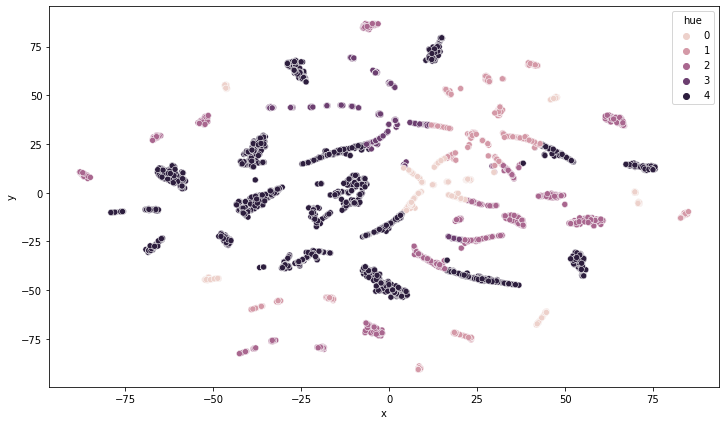

In [233]:
#tsne scatterplot for Django Unchained
fig, ax = plt.subplots(figsize = (12,7))
sns.scatterplot(
    x = "x", y="y",
    hue="hue",
    ax = ax,
    data=embedding)
plt.savefig('images/tsne_djangounchained.jpg')

# Hocus Pocus

## LDA 

In [234]:
#read in Hocus Pocus csv
HocusPocus = pd.read_csv('HocusPocus.csv')
HocusPocus.drop(columns=['Unnamed: 0'], axis = 1, inplace = True)
HocusPocus.head()

,date,tweet,language,hashtags,username,link,retweet,nlikes,nreplies,nretweets,vader_score,positive sentiment score,negative sentiment score,neutral sentiment score,compound sentiment score
0,2015-09-29 19:57:07,"@WarlockTriqz Hocus Pocus, Halloween Town, Nig...",en,[],veroicone,https://twitter.com/veroicone/status/649010043...,False,0,1,0,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.000,0.000,1.000,0.0000
1,2015-09-29 19:53:43,hocus pocus and chill fall edition lmao #justk...,en,"['justkidding', 'idonthavefriends']",lyaanneeee,https://twitter.com/lyaanneeee/status/64900918...,False,0,0,0,"{'neg': 0.0, 'neu': 0.672, 'pos': 0.328, 'comp...",0.328,0.000,0.672,0.5994
2,2015-09-29 19:52:13,I tried REAAALLLLYYYY hard not to watch it bef...,en,['hocuspocus'],BryceFSU,https://twitter.com/BryceFSU/status/6490088129...,False,0,0,0,"{'neg': 0.085, 'neu': 0.915, 'pos': 0.0, 'comp...",0.000,0.085,0.915,-0.1260
3,2015-09-29 19:50:49,Hocus Pocus and chill,en,[],estherabinowitz,https://twitter.com/estherabinowitz/status/649...,False,10,0,6,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.000,0.000,1.000,0.0000
4,2015-09-29 19:49:05,"#bravobag Carlton: eye of newt, the chalice Du...",en,['bravobag'],MrCJHarper,https://twitter.com/MrCJHarper/status/64900802...,False,6,0,1,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.000,0.000,1.000,0.0000


In [235]:
#tokenizing each tweet
tokenized_tweets = []
for tweet in HocusPocus['tweet']:
    tokenized_tweets.append(tokenizer.tokenize(tweet.lower())) #making all tweets lowercase so no word is duplicated later on
# tokenized_tweets

In [236]:
#lemmatize tweets
lemmatized_tweets=[]
for tweet in tokenized_tweets:
    lemmatized_words = []
    for word in tweet:
        if word not in stopwords_list:
            lemmatized_words.append(lemmatizer.lemmatize(word))
    lemmatized_tweets.append(lemmatized_words)

# lemmatized_tweets

In [237]:
#adding to Hocus Pocus dataframe 

#lemmatized tweets list version
HocusPocus['lemmatize'] = lemmatized_tweets

#string version
lemmatized_tweets_str_lst = []
for tweet in HocusPocus['lemmatize'].tolist():
    lemmatized_tweets_str_lst.append(" ".join(tweet))

HocusPocus['string_lemmatized'] = lemmatized_tweets_str_lst

HocusPocus.head()

,date,tweet,language,hashtags,username,link,retweet,nlikes,nreplies,nretweets,vader_score,positive sentiment score,negative sentiment score,neutral sentiment score,compound sentiment score,lemmatize,string_lemmatized
0,2015-09-29 19:57:07,"@WarlockTriqz Hocus Pocus, Halloween Town, Nig...",en,[],veroicone,https://twitter.com/veroicone/status/649010043...,False,0,1,0,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.000,0.000,1.000,0.0000,"[warlocktriqz, hocus, pocus, halloween, town, ...",warlocktriqz hocus pocus halloween town nightm...
1,2015-09-29 19:53:43,hocus pocus and chill fall edition lmao #justk...,en,"['justkidding', 'idonthavefriends']",lyaanneeee,https://twitter.com/lyaanneeee/status/64900918...,False,0,0,0,"{'neg': 0.0, 'neu': 0.672, 'pos': 0.328, 'comp...",0.328,0.000,0.672,0.5994,"[hocus, pocus, chill, fall, edition, lmao, jus...",hocus pocus chill fall edition lmao justkiddin...
2,2015-09-29 19:52:13,I tried REAAALLLLYYYY hard not to watch it bef...,en,['hocuspocus'],BryceFSU,https://twitter.com/BryceFSU/status/6490088129...,False,0,0,0,"{'neg': 0.085, 'neu': 0.915, 'pos': 0.0, 'comp...",0.000,0.085,0.915,-0.1260,"[tried, reaaallllyyyy, hard, watch, october, w...",tried reaaallllyyyy hard watch october wait ho...
3,2015-09-29 19:50:49,Hocus Pocus and chill,en,[],estherabinowitz,https://twitter.com/estherabinowitz/status/649...,False,10,0,6,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.000,0.000,1.000,0.0000,"[hocus, pocus, chill]",hocus pocus chill
4,2015-09-29 19:49:05,"#bravobag Carlton: eye of newt, the chalice Du...",en,['bravobag'],MrCJHarper,https://twitter.com/MrCJHarper/status/64900802...,False,6,0,1,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.000,0.000,1.000,0.0000,"[bravobag, carlton, eye, newt, chalice, dumble...",bravobag carlton eye newt chalice dumbledore d...


In [238]:
# sparse Document Term Matrix
vec = CountVectorizer(stop_words=stopwords_list)
X = vec.fit_transform(HocusPocus['string_lemmatized'].tolist())
df = pd.DataFrame(X.toarray(), columns = vec.get_feature_names())
df.head()

,00,000,00a,00pm,00s,01482,01cxk29vzb,02,02nbak11r6,0402,...,zv6buo922v,zvan5afsq5,zvustfvuhm,zvwejhk6tv,zwbzqkv82e,zwraxlatep,zx34oqllj3,zxpnxqda2z,zy5vw0ik6p,zywf3p9uhm
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [239]:
#dictionary of numbers to words
dictionary = corpora.Dictionary(HocusPocus['lemmatize'])

In [240]:
#bag of words (tokenid, tokencount)
corpus = []
for tweet in HocusPocus['lemmatize']:
    corpus.append(dictionary.doc2bow(tweet))

In [241]:
#running LDA model for Hocus Pocus
lda = models.LdaMulticore(corpus=corpus, id2word=dictionary, num_topics=5, passes=10)
for elem in lda.print_topics():
    print("Topic", elem[0], "\nWords:", elem[1])

Topic 0 
Words: 0.090*"hocus" + 0.090*"pocus" + 0.047*"watch" + 0.014*"hocuspocus" + 0.012*"october" + 0.011*"want" + 0.010*"cemetery" + 0.010*"time" + 0.009*"wait" + 0.009*"wanna"
Topic 1 
Words: 0.063*"hocuspocus" + 0.019*"gt" + 0.014*"hocus" + 0.013*"pocus" + 0.010*"little" + 0.009*"child" + 0.009*"come" + 0.009*"halloween" + 0.007*"18" + 0.007*"available"
Topic 2 
Words: 0.112*"hocus" + 0.112*"pocus" + 0.041*"halloween" + 0.021*"movie" + 0.016*"watching" + 0.011*"town" + 0.010*"watch" + 0.008*"fall" + 0.008*"day" + 0.008*"put"
Topic 3 
Words: 0.081*"hocus" + 0.081*"pocus" + 0.010*"villain" + 0.010*"spelltacular" + 0.009*"youtube" + 0.008*"movie" + 0.008*"video" + 0.007*"bette" + 0.007*"actor" + 0.006*"midler"
Topic 4 
Words: 0.124*"hocus" + 0.123*"pocus" + 0.022*"chill" + 0.011*"never" + 0.011*"halloweentown" + 0.009*"seen" + 0.008*"halloween" + 0.007*"focus" + 0.007*"arianagrande" + 0.006*"hocuspocus"


In [243]:
# Display model for Hocus Pocus
pyLDAvis.enable_notebook()
vis = pyLDAvis.gensim.prepare(lda, corpus, dictionary)
vis
# pyLDAvis.save_html(vis, 'images/lda_hocuspocus.html')

PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
2     -0.063792  0.052073       1        1  30.928419
4     -0.059825  0.009754       2        1  24.139981
0     -0.060913  0.059340       3        1  22.365198
3     -0.013241 -0.149201       4        1  14.531047
1      0.197771  0.028034       5        1   8.035355, topic_info=           Term        Freq       Total Category  logprob  loglift
17   hocuspocus  491.000000  491.000000  Default  30.0000  30.0000
8         watch  668.000000  668.000000  Default  29.0000  29.0000
9         chill  242.000000  242.000000  Default  28.0000  28.0000
1     halloween  729.000000  729.000000  Default  27.0000  27.0000
152          gt   95.000000   95.000000  Default  26.0000  26.0000
..          ...         ...         ...      ...      ...      ...
289        year   11.775387   95.141768   Topic5  -5.7268   0.4320
107       movie   17.372755  496.621492   Topic5  -5.3379  -0.8316
299           2   11.300425   99.774795   Topic5  -5.7679   0.3432
185        like   10.458386  207.559351   Topic5  -5.8454  -0.4667
100           u    8.174631   39.483119   Topic5  -6.0917   0.9465

[340 rows x 6 columns], token_table=      Topic      Freq     Term
term                          
193       1  0.152965       10
193       2  0.688342       10
193       3  0.025494       10
193       4  0.152965       10
1108      5  0.958104       18
...     ...       ...      ...
615       2  0.015612  youtube
615       3  0.046837  youtube
615       4  0.905509  youtube
1561      3  0.245273  zachary
1561      5  0.613181  zachary

[645 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[3, 5, 1, 4, 2])

## TSNE

In [244]:
#create matrix from LDA model
X = []
for i in range(len(corpus)):
    if len(lda[corpus[i]]) == 5:
        X.append([y for (x,y) in lda[corpus[i]]])        
# X

In [245]:
#reduce dimensionality
tsne = TSNE(n_components=2, random_state=27)
embedding = tsne.fit_transform(np.array(X))
embedding = pd.DataFrame(embedding, columns=['x','y'])
embedding['hue'] = np.array(X).argmax(axis=1)

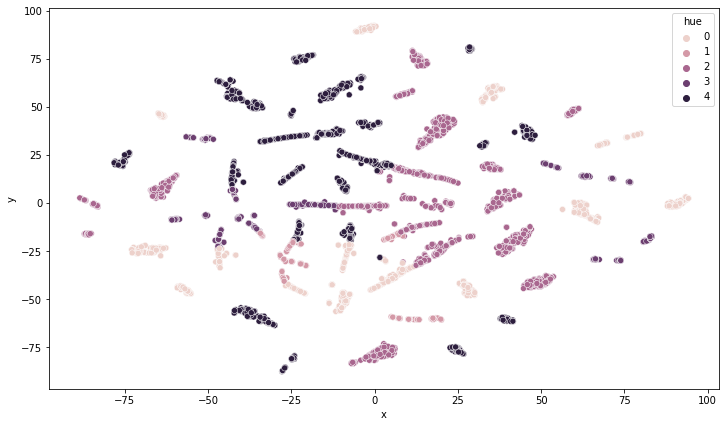

In [246]:
#scatter plot of reduced dimensionality for Hocus Pocus
fig, ax = plt.subplots(figsize = (12,7))
sns.scatterplot(
    x = "x", y="y",
    hue="hue",
    ax = ax,
    data=embedding)
plt.savefig('images/tsne_hocuspocus.jpg')